# 1. Object Detection
## 1-1. Object Detection Data Formats
- **JSON**
    - **COCO:** JSON annotations used with [EfficientDet Pytorch](https://roboflow.com/model/efficientdet) & [Detectron 2](https://roboflow.com/model/detectron2)
    - **COCO-MMDetection:** JSON annotations used with [MMDetection](https://github.com/open-mmlab/mmdetection)
    - **CreateML:** Proprietary JSON format used with Apple's CreateML & Turi Create tools.
    - **PaliGemma:** JSONL annotations used to fine-tune [PaliGemma](https://roboflow.com/model/paligemma).
- **XML**
    - **Pascal VOC:** Common XML format for local data munging (not often used directly with object detection models, but is used with segmentation models).
- **TXT**
    - **YOLO Darknet:** TXT annotations used with [YOLO Darknet](https://roboflow.com/models) (both v3 & v4) & [YOLOv3 PyTorch](https://roboflow.com/model/yolov3-pytorch).
    - **YOLO v3 Keras:** TXT annotations used with [YOLOv3 Keras](https://roboflow.com/model/yolov3-keras).
    - **YOLO v4 PyTorch:** TXT annotations used with [YOLOv4 PyTorch](https://roboflow.com/model/yolov4-pytorch) (deprecated).
    - **Scaled-YOLOv4:** TXT annotations used with [Scaled-YOLOv4](https://blog.roboflow.com/how-to-train-scaled-yolov4/).
    - **YOLOv5 Oriented Bounding Boxes:** TXT annotations used with [yolov5_obb](https://roboflow.com/models).
    - **meituan/YOLOv6:** TXT annotations used with [mt-yolov6](https://roboflow.com/model/mt-yolov6).
    - **YOLO v5 PyTorch:** TXT annotations & YAML config used with [YOLOv5](https://roboflow.com/model/yolov5).
    - **YOLO v7 PyTorch:** TXT annotations & YAML config used with [YOLOv7](https://roboflow.com/model/yolov7).
    - **YOLOv8:** TXT annotations & YAML config used with [YOLOv8](https://roboflow.com/models).
    - **YOLOv8 Oriented Bounding Boxes:** TXT annotations used with [yolov8_obb](https://roboflow.com/model/yolov8-obb).
    - **YOLOv9:** TXT annotations & YAML config used with [YOLOv9](https://roboflow.com/model/yolov9).
- **CSV**
    - **Tensorflow Object Detection:** CSV format used with Tensorflow (usually converted before training so you probably want to export as a TFRecord instead unless you need to inspect the human-readable CSV).
    - **RetinaNet Keras:** A custom CSV format used by the Keras implementation of RetinaNet.
    - **Multi-Label Classification:** Converts your object detection dataset into a classification dataset.
- **Other**
    - **OpenAI Clip Classification:** Converts your object detection dataset a classification dataset for use with OpenAI CLIP.
    - **Tensorflow TFRecord:** Binary format used for both [Tensorflow 1.5](https://roboflow.com/model/mobilenet-ssd-v2) & [Tensorflow 2.0 Object Detection](https://roboflow.com/model/efficientdet-tensorflow-2) models.
    - **Server Benchmark:** Used with Roboflow's server benchmark app.
- **Code-Free Training Integrations**
    - **Ultralytics Hub:** Passes your API Key to Ultralytics Hub to pull your dataset for AutoML training.
    - **AWS Rekognition Custom Labels**
    - **Google Cloud AutoML**
    - **Microsoft Azure Custom Vision**

# 2. YOLO

1. `ultralytics.engine.model.Model(model="yolo11n.pt", task=None, verbose=False)`
    - Attributes
        - `callbacks`
        - `predictor`
    - Methods
        - `val(validator=None, **kwargs)`: Validates the model using a specified dataset and validation configuration. Returns a `ultralytics.utils.metrics.DetMetrics` for a detection task.
2. `ultralytics.utils.metrics.DetMetrics(save_dir=Path('.'), plot=False, on_plot=None, names={})`: Utility class for computing detection metrics.
    - Attributes
        - `plot`
        - `box`
    - Methods
4. `ultralytics.engine.results.Results(orig_img, path, names, boxes=None, masks=None, probs=None, keypoints=None, obb=None, speed=None)`
    - `orig_img`
    - `orig_shape`

YOLO series as follows:
- [You Only Look Once: Unified, Real-Time Object Detection](https://arxiv.org/abs/1506.02640) by Joseph Redmon
- [YOLO9000: Better, Faster, Stronger](https://arxiv.org/abs/1612.08242) by Joseph Redmon
- [YOLOv3: An Incremental Improvement](https://arxiv.org/abs/1804.02767) by Joseph Redmon
- [YOLOv4: Optimal Speed and Accuracy of Object Detection](https://arxiv.org/abs/2004.10934) by Alexey Bochkovskiy, Chien-Yao Wang
- [Scaled-YOLOv4: Scaling Cross Stage Partial Network](https://arxiv.org/abs/2011.08036) by Chien-Yao Wang, Alexey Bochkovskiy
- [Comprehensive Guide to Ultralytics YOLOv5](https://docs.ultralytics.com/yolov5/) by Ultralytics
- [You Only Learn One Representation: Unified Network for Multiple Tasks](https://arxiv.org/abs/2105.04206) by Chien-Yao Wang
- [YOLOX: Exceeding YOLO Series in 2021](https://arxiv.org/abs/2107.08430) by Megvii Technology
- [YOLOv7: Trainable Bag-of-Freebies Sets New State-of-the-Art for Real-Time Object Detectors](https://arxiv.org/abs/2207.02696) by Chien-Yao Wang & Alexey Bochkovskiy
- [YOLOv6: A Single-Stage Object Detection Framework for Industrial Applications](https://arxiv.org/abs/2209.02976) by Meituan Vision
- [Ultralytics YOLOv8](https://docs.ultralytics.com/models/yolov8/) by Ultralytics
- [YOLO-NAS](https://github.com/Deci-AI/super-gradients/blob/master/YOLONAS.md) by Deci
- [YOLOv9: Learning What You Want to Learn Using Programmable Gradient Information](https://arxiv.org/abs/2402.13616) by Chien-Yao Wang
- [YOLOv10: Real-Time End-to-End Object Detection](https://arxiv.org/abs/2405.14458) by Tsinghua University
- [Ultralytics YOLO11](https://docs.ultralytics.com/models/yolo11/) by Ultralytics

Real-time open-vocabulary object detection:
- [YOLO-World: Real-Time Open-Vocabulary Object Detection](https://arxiv.org/abs/2401.17270) by Tencent AI Lab

In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.7 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16072MiB)
Setup complete ✅ (32 CPUs, 125.5 GB RAM, 1604.0/1641.0 GB disk)


In [6]:
# Update `.config/Ultralytics/settings.json` & `.config/Ultralytics/settings.yaml` files if required
!yolo settings

JSONDict("/home/yungshun317/.config/Ultralytics/settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "/home/yungshun317/workspace/py/torch-cv/datasets",
  "weights_dir": "weights",
  "runs_dir": "runs",
  "uuid": "8bc208799e1b355670df79bf44d8a146a3aff8679ab599505a7778e8b8dc920f",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": true,
  "hub": true,
  "mlflow": true,
  "neptune": true,
  "raytune": true,
  "tensorboard": true,
  "wandb": true,
  "vscode_msg": true
}
💡 Learn more about Ultralytics Settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings


## 2-1. YOLOv3
- [YOLOv3, YOLOv3-Ultralytics, and YOLOv3u](https://docs.ultralytics.com/models/yolov3/)

In [4]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLOv3n model
model = YOLO("yolov3.pt")

# Display model information
model.info()

PRO TIP 💡 Replace 'model=yolov3.pt' with new 'model=yolov3u.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|████████████████████████████████████████| 198M/198M [00:09<00:00, 22.1MB/s]


YOLOv3 summary: 310 layers, 103,754,144 parameters, 0 gradients, 283.3 GFLOPs


(310, 103754144, 0, 283.3201664)

In [5]:
# Inspect the model
print(model)

# View attributes of the model
# from pprint import pprint
# pprint(vars(model))

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): Bottleneck(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, mome


image 1/1 /home/yungshun317/workspace/py/torch-cv/data/cat_dog_image.jpg: 640x640 1 cat, 1 dog, 19.5ms
Speed: 17.6ms preprocess, 19.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

Results:
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife

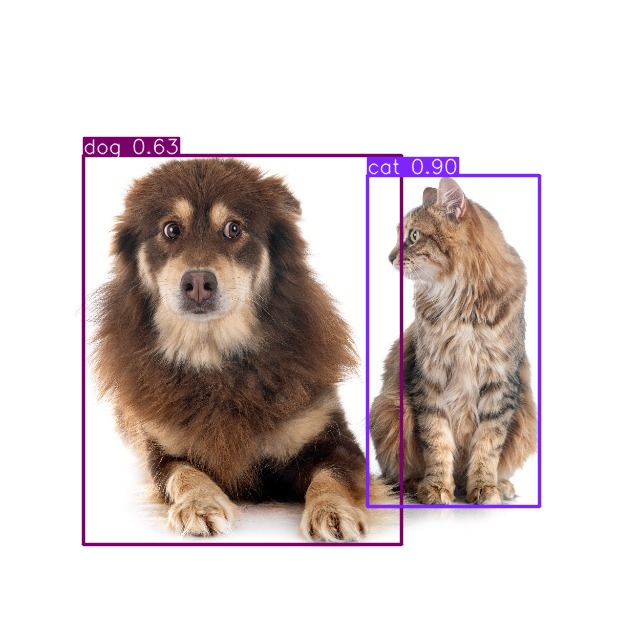

In [25]:
# Prediction
import torch, cv2
import matplotlib.pyplot as plt

results = model("data/cat_dog_image.jpg")
print()
print("Results:")
print(results)
print()

for result in results:
    print("Boxes:")
    print(result.boxes)
    result.show()
    result.save(filename="outputs/result.jpg")

In [52]:
# Validation
results = model.val(data="coco8.yaml", imgsz=640)
print()
print("mAP:", results.box.map)

Ultralytics 8.3.7 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16072MiB)


val: Scanning /home/yungshun317/workspace/py/onnx-tensorrt-inference/yolov5/yolo
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all          4         17      0.869      0.897      0.974       0.76
                person          3         10          1      0.427      0.869      0.496
                   dog          1          1      0.798          1      0.995      0.895
                 horse          1          2      0.835          1      0.995      0.677
              elephant          1          2          1      0.957      0.995      0.698
              umbrella          1          1      0.739          1      0.995      0.995
          potted plant          1          1      0.838          1      0.995      0.796
Speed: 0.2ms preprocess, 18.8ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val7

mAP: 0.7595557966339216


## 2-2. YOLOv4
- [darknet](https://github.com/AlexeyAB/darknet) by AlexeyAB
- [CSPNet: A New Backbone that can Enhance Learning Capability of CNN](https://arxiv.org/abs/1911.11929)

## 2-3. YOLOv5

## 2-4. YOLOR

## 2-5. YOLOX

## 2-6. YOLOv7

## 2-7. YOLOv6

## 2-8. YOLOv8

In [10]:
# Load YOLOv8 models
yolov8n_model = YOLO("yolov8n.pt")
yolov8s_model = YOLO("yolov8s.pt")
yolov8m_model = YOLO("yolov8m.pt")
yolov8l_model = YOLO("yolov8l.pt")
yolov8x_model = YOLO("yolov8x.pt")

# Display model information
print(yolov8n_model.info())
print(yolov8s_model.info())
print(yolov8m_model.info())
print(yolov8l_model.info())
print(yolov8x_model.info())

100%|██████████████████████████████████████| 49.7M/49.7M [00:03<00:00, 16.5MB/s]


YOLOv8n summary: 225 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs
(225, 3157200, 0, 8.8575488)
YOLOv8s summary: 225 layers, 11,166,560 parameters, 0 gradients, 28.8 GFLOPs
(225, 11166560, 0, 28.816844800000002)
YOLOv8m summary: 295 layers, 25,902,640 parameters, 0 gradients, 79.3 GFLOPs
(295, 25902640, 0, 79.3204224)
YOLOv8l summary: 365 layers, 43,691,520 parameters, 0 gradients, 165.7 GFLOPs
(365, 43691520, 0, 165.742848)
YOLOv8x summary: 365 layers, 68,229,648 parameters, 0 gradients, 258.5 GFLOPs
(365, 68229648, 0, 258.5472512)


In [11]:
# Inspect the model
# print(yolov8m_model)

# View attributes of the model
# from pprint import pprint
# pprint(vars(model))

In [7]:
# Train
results = yolov8m_model.train(data="VOC.yaml", epochs=100, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.20 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.7 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16072MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=coco128.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, s

train: Scanning /home/yungshun317/workspace/py/onnx-tensorrt-inference/yolov5/yo


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /home/yungshun317/workspace/py/onnx-tensorrt-inference/yolov5/yolo


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 83 weight(decay=0.0), 90 weight(decay=0.0005), 89 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.53G     0.9584       4.97      1.122        194        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929    5.1e-05    0.00771   0.000272    0.00014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.46G     0.9663      4.948      1.118        188        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929   5.94e-05    0.00898    0.00035   0.000193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.54G     0.9213      4.873      1.125        186        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929   5.87e-05    0.00887   0.000386    0.00022



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.63G     0.8927      4.819      1.099        167        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929   6.16e-05    0.00932   0.000464   0.000279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.64G     0.8859      4.726      1.067        209        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929   6.49e-05    0.00981   0.000583   0.000364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.63G     0.8395      4.613      1.061        228        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929   7.74e-05     0.0117    0.00132    0.00101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.56G     0.8328      4.498      1.045        218        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929   7.92e-05      0.012    0.00446    0.00365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.54G     0.8047      4.485      1.049        210        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929   8.11e-05     0.0123    0.00588    0.00492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.61G     0.8241      4.502      1.052        173        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929   8.18e-05     0.0124    0.00666    0.00561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.59G     0.7764       4.35      1.019        188        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929   0.000388     0.0134    0.00722      0.006



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.64G     0.8058      4.171      1.043        186        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929     0.0278    0.00401    0.00914    0.00742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.48G     0.7887      4.131      1.066        169        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929     0.0279    0.00343     0.0116    0.00947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.47G     0.7829      4.038      1.047        124        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929     0.0417    0.00524     0.0212      0.018



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.44G      0.853      3.929      1.049        273        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929     0.0633     0.0356     0.0515     0.0398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.54G     0.8247      3.819      1.032        273        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929     0.0474     0.0691     0.0627     0.0547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.55G     0.8738      3.642      1.062        176        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929       0.05      0.113     0.0821     0.0728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.48G     0.7777      3.631      1.038        321        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.148      0.224      0.162      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.56G     0.8732       3.41      1.049        194        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.115      0.341      0.169      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.47G     0.8372      3.366      1.062        293        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929     0.0948      0.418      0.192      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.47G     0.8169      3.145      1.063        203        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929     0.0766      0.507      0.214      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       7.5G     0.8765      3.081      1.045        214        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929     0.0537      0.554      0.233      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.48G     0.8455      2.992       1.03        269        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.584      0.154      0.262      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       7.5G     0.8163      2.796      1.041        148        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.549      0.214      0.299      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.54G     0.8215       2.76      1.033        255        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929      0.568      0.263      0.329      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.54G     0.8679      2.533      1.023        212        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929       0.57      0.297      0.352      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.52G     0.8312      2.453      1.027        284        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.509      0.324      0.358      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.44G     0.8492       2.36      1.055        219        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.473      0.329      0.368      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.48G     0.7892      2.372       1.03        198        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929      0.413      0.375      0.378      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.61G      0.786        2.2      1.009        244        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.502      0.363       0.41      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.52G     0.8057      2.294      1.018        238        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929       0.53      0.383      0.432      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.57G     0.8351      2.185      1.013        236        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.566      0.388      0.442      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.56G     0.8037      2.099      1.002        262        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.547      0.456      0.472      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.54G     0.7866      2.018      1.002        234        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.562      0.468      0.492      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.56G     0.7879      1.886      1.014        211        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929       0.56      0.487      0.504      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.47G     0.8358      1.988      1.017        286        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.597      0.501      0.517      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.53G     0.8124       1.85      1.028        253        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929      0.635       0.52      0.546      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.53G     0.7722      1.821      1.015        193        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.685      0.488      0.565      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.49G     0.8295      1.883      1.012        309        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.669      0.502      0.568      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.55G     0.8196      1.867      1.013        254        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929       0.61      0.525      0.573      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.48G     0.7747       1.75      1.038        142        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929       0.63      0.528      0.584      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.47G     0.7461      1.687     0.9926        204        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.632      0.572      0.607      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.54G     0.7395      1.651     0.9842        248        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929       0.65      0.582      0.627      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.48G     0.7572       1.72      1.006        366        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.752      0.566      0.643      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       7.5G     0.7575      1.558     0.9958        189        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.739      0.583       0.66       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.53G     0.7422      1.533     0.9803        241        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929      0.743      0.592      0.674      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.53G     0.7311      1.509     0.9932        220        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929      0.726      0.604       0.69      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.55G     0.7115      1.466     0.9745        276        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.721       0.62      0.701      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.51G     0.7192      1.492     0.9628        272        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929      0.718      0.626      0.707      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.56G     0.6844      1.441     0.9655        138        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.683      0.648      0.717      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.64G     0.6973      1.461     0.9757        214        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.704      0.648      0.728      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.54G     0.7199      1.471     0.9701        199        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.702      0.662      0.748      0.667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.56G     0.6878      1.405     0.9644        204        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.719      0.671      0.752      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.56G     0.7126      1.413     0.9857        320        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.748      0.681       0.77       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.54G     0.6737      1.327     0.9801        206        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.748      0.689       0.77      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.56G     0.6786      1.352       0.98        251        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.769      0.675      0.774      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.55G     0.6734      1.309     0.9759        244        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929       0.74      0.698      0.779      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.54G     0.6666      1.328     0.9913        136        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.722      0.723      0.787      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.62G     0.6708       1.32     0.9539        203        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.745      0.697      0.787      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.55G      0.669      1.237     0.9757        219        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929      0.714      0.725      0.804      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.48G     0.6701       1.26     0.9742        183        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.755      0.719      0.811      0.728

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.55G     0.6287      1.232     0.9473        171        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.768      0.749      0.817      0.733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.55G     0.6617      1.178     0.9486        256        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929      0.792      0.737      0.822      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.58G     0.6673      1.236       0.96        171        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.813      0.735      0.832      0.744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.57G     0.6217      1.209      0.942        203        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.805      0.746      0.834      0.747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.46G     0.6347       1.19     0.9487        292        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.816      0.743       0.84      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.48G     0.6013      1.136     0.9421        192        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.816      0.749      0.841      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.45G     0.6134      1.167     0.9378        244        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.738      0.802      0.842       0.75

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.48G     0.6289      1.141     0.9606        227        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.755      0.797      0.843      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.51G     0.5998      1.131     0.9309        277        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.788      0.784      0.845      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.54G     0.6091      1.092     0.9529        167        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.841       0.77      0.847      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.49G     0.6368      1.139     0.9657        160        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.822      0.781      0.849      0.758

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.48G     0.5975      1.064     0.9416        207        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.823      0.793      0.851      0.763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.52G     0.6124      1.126     0.9443        220        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.807      0.801      0.852      0.762

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.59G     0.5854      1.048     0.9123        180        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.834      0.794      0.852      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.57G     0.6097      1.103     0.9331        247        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.834      0.801      0.858      0.773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.47G     0.6041      1.069     0.9469        207        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.846      0.801      0.862      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.51G     0.5969      1.047     0.9322        198        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.854       0.81      0.867       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.58G     0.5711     0.9976     0.9383        189        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.861       0.81      0.864      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.46G     0.6157      1.102      0.952        221        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929       0.86      0.818      0.868      0.784

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.55G     0.5666      1.036     0.9346        152        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.873      0.817      0.872       0.79

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.53G     0.6084      1.047      0.941        166        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.871      0.822       0.88      0.799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.45G     0.5947      1.041     0.9346        265        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.873      0.818      0.887      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.55G     0.5674      1.031     0.9163        185        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.875      0.819      0.889      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.48G     0.6039      1.008     0.9464        208        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.882      0.819      0.894      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.52G     0.5795       1.09     0.9227        361        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.882      0.815      0.891      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.44G     0.5703      1.021     0.9465        232        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.888      0.814      0.893       0.81

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.44G     0.5801     0.9801     0.9554        177        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.891      0.815      0.896      0.811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.45G     0.5933      1.038     0.9395        203        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        128        929      0.886      0.822      0.904      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.66G     0.5527      1.021      0.926        301        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.889      0.821      0.905       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.62G     0.5787     0.9945     0.9206        204        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.891      0.822      0.898      0.816
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.45G     0.5374      1.039     0.8723        171        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.886      0.824      0.902      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.44G     0.5445      1.069     0.9299        130        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.875      0.829      0.894      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.54G     0.5343      1.001     0.8991        122        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.862      0.834      0.893      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.56G     0.5353      0.985     0.8877        122        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.853      0.828      0.887      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.45G     0.5289     0.9653     0.8989        126        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.853      0.827      0.885      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.53G     0.5082     0.9813     0.8744        121        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929       0.86      0.827      0.894      0.811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.44G     0.5082     0.9694     0.8659        102        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.857      0.829      0.894      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.45G     0.4944     0.9658     0.8715        125        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.857      0.825       0.89      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.43G     0.5376      1.012     0.8955         73        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.857      0.823      0.889      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.48G     0.5024     0.9852      0.869         77        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.858      0.818      0.889      0.808

100 epochs completed in 0.089 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 46.9MB
Optimizer stripped from runs/detect/train/weights/best.pt, 46.9MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.7 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16072MiB)
Model summary (fused): 236 layers, 23,249,152 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.889      0.821      0.905      0.821
                person         61        254      0.982      0.894      0.953       0.83
               bicycle          3          6          1      0.416      0.837       0.72
                   car         12         46      0.802      0.587      0.698      0.429
            motorcycle          4          5      0.913          1      0.995      0.976
              airplane          5          6      0.947          1      0.995      0.979
                   bus          5          7      0.903      0.714      0.874      0.849
                 train          3          3      0.893          1      0.995      0.995
                 truck          5         12        0.7        0.5      0.701      0.616
                  boat          2          6          1      0.631      0.846      0.714
         traffic light          4         14          1      0.398      0.446      0.323
             stop sig

In [13]:
# Validation
results = yolov8m_model.val(data="coco128.yaml", imgsz=640)
print()
print("mAP:", results.box.map)

Ultralytics 8.3.20 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16072MiB)


val: Scanning /home/yungshun317/workspace/py/torch-cv/datasets/coco128/labels/tr
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929      0.706       0.73      0.784      0.613
                person         61        254      0.828      0.741      0.856      0.654
               bicycle          3          6          1      0.628      0.789      0.579
                   car         12         46      0.759      0.343      0.551      0.306
            motorcycle          4          5       0.76          1      0.962      0.805
              airplane          5          6      0.825          1      0.995      0.928
                   bus          5          7      0.752      0.714      0.837      0.719
                 train          3          3      0.815          1      0.995      0.995
                 truck          5         12      0.744      0.487      0.588      0.337
                  boat          2          6      0.766        0.5      0.703      0.548
         traffic light          4         14      0.804      0.294      0.455       0.25
             stop sig


image 1/1 /home/yungshun317/workspace/py/torch-cv/data/cat_dog_image_1.jpg: 640x640 1 cat, 1 dog, 8.3ms
Speed: 15.7ms preprocess, 8.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

Results:
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife

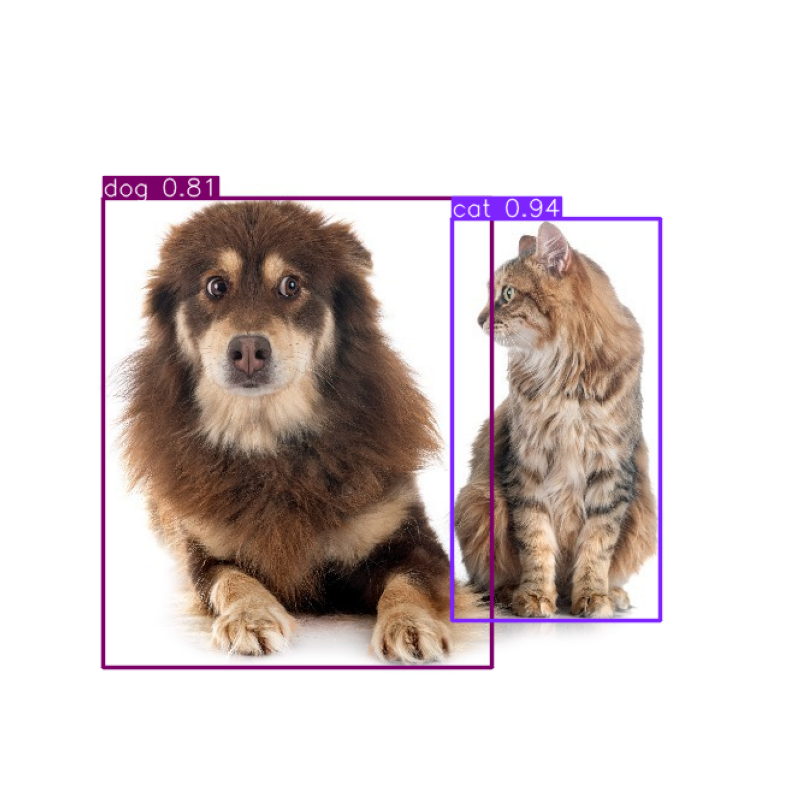

In [32]:
# Prediction
import os, torch, cv2
import matplotlib.pyplot as plt

image_path = "data/cat_dog_image_1.jpg"
results = yolov8m_model(image_path)
print()
print("Results:")
print(results)
print()

for result in results:
    print("Boxes:")
    print(result.boxes)

    # result.show()
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Display images with matplotlib 
    result.save(filename="outputs/cat_dog_image_result.jpg")
    
    # print(image_path.split(os.path.sep)[-1])
    # cat_dog_image.jpg
    # print(os.path.splitext(image_path.split(os.path.sep)[-1])[0])
    # cat_dog_image
    result.save(filename=os.path.splitext("outputs/" + image_path.split(os.path.sep)[-1])[0] + "_" + yolov8m_model.model_name + "_result.jpg")

## 2-9. YOLO-NAS

## 2-10. YOLOv9

## 2-11. YOLOv10

## 2-12. YOLO11

In [2]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLOv3n model
yolo11n_model = YOLO("yolo11n.pt")
yolo11s_model = YOLO("yolo11s.pt")
yolo11m_model = YOLO("yolo11m.pt")
yolo11l_model = YOLO("yolo11l.pt")
yolo11x_model = YOLO("yolo11x.pt")

# Display model information
print(yolo11n_model.info())
print(yolo11s_model.info())
print(yolo11m_model.info())
print(yolo11l_model.info())
print(yolo11x_model.info())

YOLO11n summary: 319 layers, 2,624,080 parameters, 0 gradients, 6.6 GFLOPs
(319, 2624080, 0, 6.614336)
YOLO11s summary: 319 layers, 9,458,752 parameters, 0 gradients, 21.7 GFLOPs
(319, 9458752, 0, 21.718374400000002)
YOLO11m summary: 409 layers, 20,114,688 parameters, 0 gradients, 68.5 GFLOPs
(409, 20114688, 0, 68.52838399999999)
YOLO11l summary: 631 layers, 25,372,160 parameters, 0 gradients, 87.6 GFLOPs
(631, 25372160, 0, 87.6134912)
YOLO11x summary: 631 layers, 56,966,176 parameters, 0 gradients, 196.0 GFLOPs
(631, 56966176, 0, 195.9587328)


In [1]:
# Inspect the model
print(yolo11m_model)

# View attributes of the model
# from pprint import pprint
# pprint(vars(model))

In [2]:
# Train
results = yolo11m_model.train(data="VOC.yaml", epochs=100, imgsz=640)

Ultralytics 8.3.20 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16072MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=VOC.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

train: Scanning /home/yungshun317/workspace/py/torch-cv/datasets/VOC/labels/trai


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /home/yungshun317/workspace/py/torch-cv/datasets/VOC/labels/test20


val: New cache created: /home/yungshun317/workspace/py/torch-cv/datasets/VOC/labels/test2007.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.65G     0.8062      1.273      1.176         31        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       4952      12032      0.763      0.744      0.798      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.59G     0.9449      1.218      1.283         54        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       4952      12032      0.683      0.606      0.665      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.57G       1.08      1.461      1.383        130        640:  


KeyboardInterrupt: 

In [4]:
# Validation
results = yolo11n_model.val(data="coco128.yaml", imgsz=640)
print()
print("mAP:", results.box.map)

Ultralytics 8.3.20 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16072MiB)


val: Scanning /home/yungshun317/workspace/py/torch-cv/datasets/coco128/labels/tr
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        128        929       0.66      0.593      0.672      0.506
                person         61        254      0.799      0.693       0.79      0.543
               bicycle          3          6      0.388      0.167      0.424      0.269
                   car         12         46      0.654      0.196      0.244      0.156
            motorcycle          4          5       0.65          1      0.995      0.789
              airplane          5          6      0.844      0.833      0.955      0.845
                   bus          5          7      0.773      0.714      0.726      0.639
                 train          3          3       0.75      0.999       0.83      0.748
                 truck          5         12       0.47       0.25      0.379      0.236
                  boat          2          6      0.338      0.341      0.456      0.342
         traffic light          4         14      0.504      0.143      0.234      0.142
             stop sig


image 1/1 /home/yungshun317/workspace/py/torch-cv/data/cat_dog_image.jpg: 640x640 1 cat, 1 dog, 10.2ms
Speed: 18.4ms preprocess, 10.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

Results:
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife

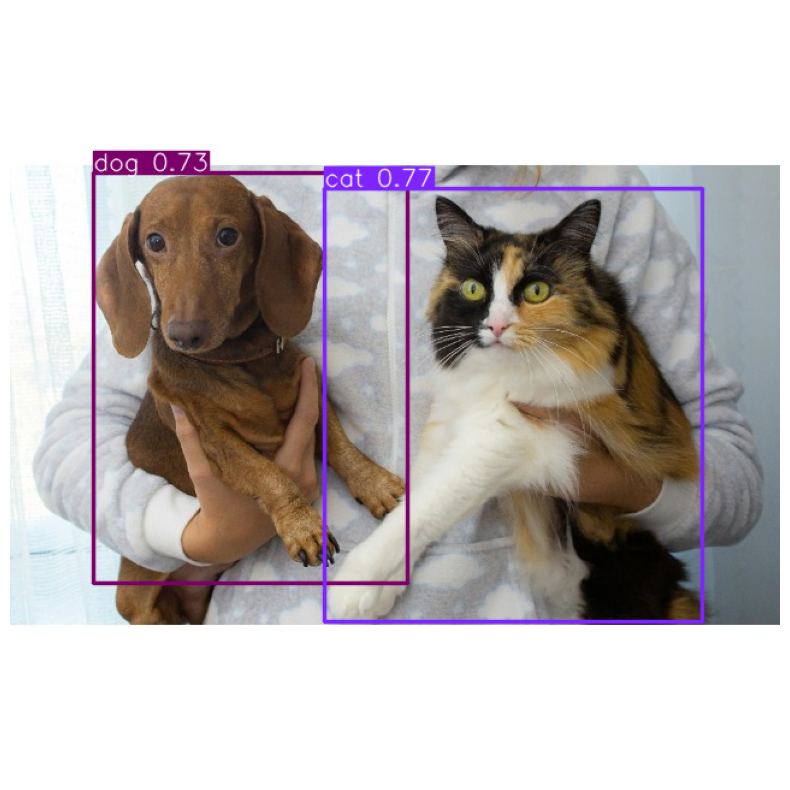

In [35]:
# Prediction
%matplotlib inline
import os, torch, cv2
import matplotlib.pyplot as plt

image_path = "data/cat_dog_image.jpg"
results = yolo11n_model(image_path)
print()
print("Results:")
print(results)
print()

for result in results:
    print("Boxes:")
    print(result.boxes)

    # result.show()
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Display images with matplotlib 
    result.save(filename="outputs/cat_dog_image_result.jpg")
    
    # print(image_path.split(os.path.sep)[-1])
    # cat_dog_image.jpg
    # print(os.path.splitext(image_path.split(os.path.sep)[-1])[0])
    # cat_dog_image
    result.save(filename=os.path.splitext("outputs/" + image_path.split(os.path.sep)[-1])[0] + "_" + yolo11n_model.model_name + "_result.jpg")

## 2-12-1. Self Driving Car Object Detection with YOLO11

Roboflow supports the injection, conversion & exportation of over 30 computer vision formats. 
- [Roboflow Universe](https://universe.roboflow.com/)
- [Roboflow Notebooks](https://github.com/roboflow/notebooks): Examples & tutorials on SOTA computer vision models & techniques provided by Roboflow.
- [Label Map](https://blog.roboflow.com/label-map/): A label maps, which is the separate source of record for class annotations, is referenced to look up the class name. Not that not all computer vision dataset formats use label maps.

Use the small-sized [Udacity Self Driving Car Dataset](https://public.roboflow.com/object-detection/self-driving-car) for example.


In [16]:
# Retrieve data from Roboflow
!pip install roboflow
from roboflow import Roboflow

# Fill in the `api_key` field
rf = Roboflow(api_key="")
project = rf.workspace("roboflow-gw7yv").project("self-driving-car")
version = project.version(3)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Self-Driving-Car-3 in yolov11:: 100%|█| 59606/


In [45]:
print(dataset.__dict__)

{'name': 'Self Driving Car', 'version': '3', 'model_format': 'yolov11', 'location': '/home/yungshun317/workspace/py/torch-cv/Self-Driving-Car-3'}


Unfortunately, the dataset has not yet been performed train test split and is very unbalanced, some classes are under represented. Also because Roboflow has 10000 image limitation, we are going to perform downsampling for a subset of the entire dataset, upload them to Roboflow for facilitating the preprocessing procedure. For improving the model performance & preventing bias, Roboflow will deduplicate the dataset by hashing the image contents & comparing to ensure that each image is unique at a pixel level.

In [80]:
import random 

random.seed(0)
random_indices = random.sample(list(range(29800)), k=10000)
# print("Random Indices:", random_indices)
print("Random Indices Shape:", len(random_indices))

Random Indices Shape: 10000


In [81]:
def sorted_directory_listing_with_os_listdir(directory):
    items = os.listdir(directory)
    sorted_items = sorted(items)
    return sorted_items

sorted_image_list = sorted_directory_listing_with_os_listdir("/home/yungshun317/workspace/py/torch-cv/Self-Driving-Car-3/export/images")
sorted_label_list = sorted_directory_listing_with_os_listdir("/home/yungshun317/workspace/py/torch-cv/Self-Driving-Car-3/export/labels")
print(len(sorted_image_list))
print(len(sorted_label_list))

29800
29800


In [86]:
from pathlib import Path
import shutil

image_src = "/home/yungshun317/workspace/py/torch-cv/Self-Driving-Car-3/export/images/"
image_dst = "/home/yungshun317/workspace/py/torch-cv/Self-Driving-Car-3/subset/images/"
label_src = "/home/yungshun317/workspace/py/torch-cv/Self-Driving-Car-3/export/labels/"
label_dst = "/home/yungshun317/workspace/py/torch-cv/Self-Driving-Car-3/subset/labels/"

Path(image_dst).mkdir(parents=True, exist_ok=True)
Path(label_dst).mkdir(parents=True, exist_ok=True)

for idx in random_indices:
    shutil.copyfile(image_src + sorted_image_list[idx], image_dst + sorted_image_list[idx])
    shutil.copyfile(label_src + sorted_label_list[idx], label_dst + sorted_label_list[idx])

In [103]:
# Check if all data names are the same
image_list = os.listdir(image_dst)
label_list = os.listdir(label_dst)

image_name_list = list(map(lambda image: image[:-4], image_list))
label_name_list = list(map(lambda label: label[:-4], label_list))

name_list = set(image_name_list).intersection(set(label_name_list))
print(len(name_list))

10000


In [104]:
# Copy the following code from Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("yungshun317").project("udacity-self-driving-car-dataset")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Udacity-Self-Driving-Car-Dataset-1 in yolov11:


In [1]:
# The `with` keyword automatically closes the file when you are done
with open("/home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset-1/data.yaml") as f:
    # Inspect what `data.yaml` looks like
    print(f.read())

train: train/images
val: valid/images
test: test/images

nc: 11
names: ['biker', 'car', 'pedestrian', 'trafficLight', 'trafficLight-Green', 'trafficLight-GreenLeft', 'trafficLight-Red', 'trafficLight-RedLeft', 'trafficLight-Yellow', 'trafficLight-YellowLeft', 'truck']

roboflow:
  workspace: yungshun317
  project: udacity-self-driving-car-dataset
  version: 1
  license: MIT
  url: https://universe.roboflow.com/yungshun317/udacity-self-driving-car-dataset/dataset/1



In [1]:
# Train
from ultralytics import YOLO

model = YOLO("yolo11m.pt")

# Use the absolute path of the `data.yaml` file
results = model.train(data="/home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset-1/data.yaml", epochs=300, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.21 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.20 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16072MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset-1/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=Fals

train: Scanning /home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Dr

train: WARNING ⚠️ /home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset-1/train/images/1478898145212453716_jpg.rf.16a609b49915ec879faa7f7c493a13d5.jpg: 1 duplicate labels removed


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driv

val: WARNING ⚠️ /home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset-1/valid/images/1478896906656331109_jpg.rf.5cfcfed6e00ae71eb5272f592c2c4325.jpg: 1 duplicate labels removed


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      8.57G      1.529       1.33      1.169         56        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1745      12863      0.644      0.388      0.413      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      8.55G      1.498      1.053      1.156         53        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1745      12863      0.655      0.385       0.43      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      8.55G      1.551      1.096      1.187         44        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1745      12863      0.549      0.347      0.346      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      8.55G       1.59      1.122      1.217         68        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1745      12863      0.571      0.373      0.402      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      8.58G      1.564      1.085      1.216         65        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1745      12863      0.499      0.403      0.423      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      8.55G      1.547      1.044      1.209         61        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.595      0.447      0.464      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      8.54G      1.529      1.021      1.203         55        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.518       0.46      0.467       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      8.54G      1.515     0.9957      1.186         69        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1745      12863      0.663      0.461      0.496      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      8.56G        1.5     0.9771      1.183         71        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.657      0.469      0.512      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      8.53G      1.492      0.957      1.177         78        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.689       0.47       0.51      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      8.56G      1.472     0.9386      1.169         40        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.661      0.501      0.546      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      8.53G      1.466     0.9228      1.168         50        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.705      0.495      0.548       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      8.56G      1.453     0.9227      1.166         71        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.612      0.539      0.551      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      8.52G      1.446     0.8984       1.16         53        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.669      0.528      0.568      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      8.57G      1.439     0.8967      1.151         32        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.65       0.55       0.58      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      8.54G      1.432     0.8829      1.151         46        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.702      0.526      0.583       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      8.57G      1.432     0.8792      1.154         60        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.662      0.585      0.593      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      8.55G      1.418     0.8649      1.147         67        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.723      0.543      0.609      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      8.57G      1.414     0.8683      1.143         41        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.697      0.553      0.606      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      8.54G      1.402       0.85      1.141         54        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.639      0.563      0.602      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      8.63G        1.4     0.8447      1.137         69        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.705       0.57      0.619      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      8.56G      1.394     0.8377      1.131         71        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.669       0.56      0.604      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      8.62G      1.377     0.8287      1.128         40        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.739       0.56      0.635      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      8.52G       1.38     0.8266      1.126         85        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.734      0.571      0.632      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      8.57G      1.379     0.8189      1.122         40        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.709       0.57      0.641      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      8.57G      1.371     0.8143      1.122         46        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.695      0.621      0.642      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      8.57G      1.353     0.8006      1.118         65        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.728      0.587      0.646      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      8.56G      1.356     0.8002      1.121         43        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.692      0.596      0.647       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      8.55G      1.362     0.7977      1.114         34        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.752      0.603       0.67      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300       8.5G      1.343     0.7845      1.112         49        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.735      0.602      0.666      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      8.57G      1.343      0.782      1.108         45        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.749      0.583      0.663      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      8.54G      1.335      0.782      1.111         71        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.707      0.618      0.668      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      8.55G      1.334     0.7751      1.107         52        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.746      0.614      0.686      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300       8.6G      1.321     0.7555      1.101         41        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.703      0.618      0.671      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      8.56G       1.32     0.7612      1.103         64        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.769      0.604      0.672      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      8.55G      1.318     0.7592      1.101         34        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.742      0.618      0.675      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      8.59G      1.311     0.7514      1.097         39        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.785      0.622      0.683      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      8.58G      1.308     0.7494      1.097         32        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863        0.8      0.592      0.695      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      8.58G      1.294     0.7384      1.089         47        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.812      0.632      0.709      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      8.54G      1.299     0.7415      1.092         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.794      0.616      0.692      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      8.62G       1.29     0.7343      1.085         54        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.782      0.643      0.719      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      8.53G      1.289     0.7281      1.089         54        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.72      0.653      0.699      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      8.54G      1.282     0.7286      1.089         54        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.832      0.619      0.716      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      8.54G       1.28     0.7256      1.084         46        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.798      0.636      0.713      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      8.55G      1.276     0.7238      1.084         41        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.809      0.618      0.707      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      8.53G      1.264     0.7141      1.075         25        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.765      0.654      0.712        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      8.54G      1.267     0.7095      1.076         58        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.843      0.628       0.72      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      8.55G      1.271     0.7165      1.077         52        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.782      0.657      0.722      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      8.57G      1.258     0.7072      1.075         80        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.817      0.649      0.727      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      8.51G      1.246      0.698       1.07         36        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.835      0.646      0.737      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      8.58G      1.254     0.7001       1.07         74        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.82      0.658      0.736      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      8.55G      1.244     0.6926       1.07         57        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.824       0.67      0.741      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      8.54G      1.235     0.6892      1.064         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.82      0.659      0.746      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      8.54G      1.244     0.6944      1.067         24        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.814      0.688      0.747      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      8.57G      1.233     0.6856      1.066         42        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.837      0.668      0.749      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      8.53G      1.226     0.6791      1.065         50        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.799      0.674      0.739      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      8.55G      1.226     0.6804      1.059         84        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.835      0.664       0.75      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      8.53G      1.218     0.6757      1.054         18        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.813       0.68      0.759      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      8.56G      1.219      0.676      1.053         68        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.813      0.685      0.756      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      8.51G      1.207     0.6661      1.049         29        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.837      0.665      0.755      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      8.55G       1.21     0.6688      1.055         44        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.819       0.68      0.757      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      8.49G      1.208     0.6632      1.053         47        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.817      0.688      0.757      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      8.58G      1.194     0.6597      1.049         30        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.825      0.684      0.758      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      8.53G      1.194     0.6579      1.051         53        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.829      0.698      0.769      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      8.55G      1.192     0.6553       1.04         45        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.842      0.686      0.764      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      8.52G      1.184     0.6527      1.045         34        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.833      0.693      0.769      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      8.56G       1.18     0.6461       1.04         45        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.854      0.678      0.757      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      8.55G      1.178     0.6463      1.043         68        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.811       0.69      0.759      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      8.54G      1.174      0.642       1.04         63        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.825      0.707      0.767      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      8.54G      1.171     0.6407      1.038         32        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.836      0.691      0.759      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300       8.6G      1.166     0.6365      1.033         56        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.85       0.69       0.76      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      8.55G      1.166     0.6389      1.038         54        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.859      0.679      0.767      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      8.56G       1.16     0.6314      1.031         67        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.828      0.705      0.771      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300       8.5G      1.153     0.6295      1.035         15        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.843       0.69      0.775      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      8.55G      1.145     0.6256       1.03         30        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.83      0.704      0.771      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      8.53G      1.149     0.6251      1.034         73        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.845      0.691      0.771      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      8.55G      1.144     0.6204      1.027         54        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.837      0.696      0.763      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      8.55G      1.145      0.625       1.03         52        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.856      0.707      0.781      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      8.57G      1.138     0.6196      1.023         76        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.849        0.7      0.778      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      8.54G       1.13     0.6148      1.025         89        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.868      0.697      0.778      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300       8.6G      1.133     0.6103      1.021        107        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.847       0.71      0.785      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      8.48G      1.125     0.6116       1.02         65        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.837      0.708      0.786      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      8.59G      1.133     0.6128      1.027         33        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.856      0.694      0.782      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      8.56G      1.127     0.6079      1.019         22        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.845        0.7      0.775      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      8.54G      1.119     0.6043      1.017         52        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.829      0.722      0.786      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      8.52G      1.106     0.5999      1.012         44        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.851      0.707      0.788      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      8.58G       1.11     0.6003       1.01         49        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.861      0.707      0.789      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      8.59G      1.104     0.5961      1.011         47        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.851      0.706      0.781      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      8.59G      1.105     0.5993      1.011         34        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.856      0.708      0.784      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300       8.5G      1.092     0.5914      1.007         30        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.869      0.709       0.79      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      8.58G      1.103     0.5945       1.01         20        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.867      0.713       0.79       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      8.53G      1.091     0.5847      1.006         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.849      0.727      0.792       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      8.59G      1.087     0.5828      1.004         37        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.855      0.727      0.791      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300       8.5G      1.081     0.5826      1.004         50        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.857      0.718      0.785      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300       8.6G      1.085     0.5832      1.003         39        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.856      0.709      0.787      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300       8.6G       1.07      0.577     0.9996         63        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.861      0.715      0.793      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      8.55G      1.074     0.5769      1.001         96        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.88      0.713      0.795      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      8.54G      1.073     0.5782     0.9976         69        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.87      0.716      0.792      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      8.56G      1.067     0.5753     0.9959         54        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.865      0.713      0.783      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      8.54G      1.064     0.5708     0.9953         82        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.883      0.718      0.796       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      8.58G       1.06       0.57     0.9947         72        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.874      0.724      0.796       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      8.61G      1.055     0.5659     0.9948         47        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.869      0.727      0.802      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      8.55G      1.056     0.5644     0.9929         26        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.874      0.726      0.802      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      8.51G      1.059     0.5667     0.9953         41        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.873      0.726      0.805      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      8.55G      1.047     0.5606     0.9921         64        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.867      0.728      0.807      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      8.55G      1.044      0.559     0.9887         44        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.87      0.729      0.804      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      8.55G       1.04     0.5594     0.9894         70        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.857      0.736        0.8      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      8.54G      1.045     0.5575     0.9863         63        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.85      0.739      0.797      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      8.57G      1.037     0.5547      0.985         32        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.861      0.733      0.802      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      8.48G      1.028     0.5479     0.9841         74        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.849      0.735      0.798      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      8.55G      1.033     0.5506     0.9834         54        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.872      0.728      0.802      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      8.52G      1.027     0.5475     0.9821         52        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.87      0.733      0.803      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      8.57G      1.027     0.5486     0.9798         95        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.723      0.803      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      8.53G      1.022     0.5488     0.9832         56        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.874       0.73      0.803      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      8.56G      1.017     0.5438     0.9778         81        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.843      0.748        0.8      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      8.54G       1.01     0.5419     0.9778         65        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.842      0.741      0.798      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      8.56G      1.013     0.5399     0.9763         57        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.838      0.748      0.804       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      8.53G      1.005     0.5362     0.9743         38        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.841      0.748      0.805      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      8.55G      1.008     0.5413     0.9788         32        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.863      0.739      0.809      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      8.54G     0.9973     0.5333     0.9743         53        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.876      0.731      0.808      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      8.57G      1.001     0.5361     0.9731        101        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.862      0.743      0.807      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      8.53G          1     0.5311     0.9714         45        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.864      0.738      0.808      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      8.54G     0.9882     0.5306     0.9716         41        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.86      0.744      0.806      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      8.55G     0.9921     0.5291     0.9683         63        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.861      0.741      0.806      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300       8.6G     0.9896     0.5278     0.9708         66        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.856      0.745      0.808      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      8.56G     0.9874     0.5304     0.9709         32        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.856      0.746      0.808      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      8.56G     0.9867     0.5266     0.9684         43        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.859      0.746       0.81      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      8.53G      0.978     0.5243      0.969         55        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.859      0.749      0.811        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      8.55G     0.9756     0.5217     0.9627         53        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.858      0.749      0.811      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      8.54G     0.9738     0.5173     0.9639         51        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.865      0.738      0.812        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      8.56G      0.971     0.5182     0.9664         47        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.867      0.736      0.812      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      8.53G     0.9719     0.5172      0.963         27        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.874      0.736      0.813      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      8.55G     0.9649     0.5155     0.9624         85        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.877       0.74      0.812      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      8.52G     0.9623      0.512     0.9606         29        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.865      0.742      0.812      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      8.54G     0.9505     0.5091     0.9582         42        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.854      0.751      0.813      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      8.51G     0.9578      0.511     0.9574         76        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.856      0.749      0.808      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      8.57G      0.951     0.5071     0.9527         49        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.862      0.748      0.808      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      8.52G     0.9507     0.5069     0.9542         54        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.853      0.755       0.81      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      8.54G     0.9501     0.5065     0.9546         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.858       0.75       0.81      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      8.55G     0.9436     0.5025     0.9534         55        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.861       0.75       0.81      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      8.56G       0.94     0.5018     0.9509         51        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.859      0.751       0.81      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      8.52G     0.9404     0.5011     0.9516         34        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.858      0.754      0.814       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      8.58G     0.9398     0.5025     0.9516         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.854      0.755      0.813      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      8.53G     0.9335     0.4982      0.951         28        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.854      0.756      0.813      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      8.56G     0.9369     0.4968     0.9497         69        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.854      0.757      0.813      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      8.53G     0.9373     0.4987      0.951         31        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.855      0.752      0.811      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      8.57G     0.9251     0.4928     0.9465         45        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.867       0.75      0.814      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      8.52G      0.924     0.4936     0.9471         45        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.869      0.748      0.814      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      8.58G     0.9218     0.4937      0.948         62        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.868       0.75      0.815      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      8.53G     0.9264     0.4927     0.9474         89        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.867      0.752      0.814      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      8.54G     0.9206     0.4899     0.9446         37        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.871      0.749      0.813       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      8.52G     0.9154     0.4875     0.9466         66        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.873      0.749      0.813      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      8.56G      0.917     0.4897     0.9452         70        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.871       0.75      0.813      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      8.56G     0.9096     0.4846     0.9439         79        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.873       0.75      0.813      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      8.55G     0.9106     0.4867     0.9459        101        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.871      0.752      0.813      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      8.52G     0.9056     0.4819     0.9416         38        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.873      0.751      0.813      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      8.55G     0.8997      0.478     0.9396         63        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.871      0.752      0.813      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      8.48G     0.9088     0.4852     0.9413         32        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.872      0.751      0.813      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      8.54G     0.8969     0.4779     0.9389         57        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.867      0.753      0.813      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      8.55G     0.8956     0.4785     0.9369         60        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.862      0.756      0.813      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      8.56G      0.891     0.4766      0.935         37        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.863      0.755      0.813      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      8.51G     0.8902     0.4763     0.9381         97        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.864      0.754      0.813      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      8.55G     0.8884     0.4735     0.9329         64        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.864      0.753      0.813      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      8.55G     0.8811     0.4716      0.931         33        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.861      0.754      0.814      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      8.62G     0.8881     0.4729     0.9319         99        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.859      0.756      0.814      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      8.55G     0.8832     0.4734     0.9318         51        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.863      0.751      0.814      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      8.56G     0.8744     0.4666     0.9306         66        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.891      0.731      0.814      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      8.51G     0.8771     0.4705     0.9326         36        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.887      0.737      0.815      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      8.57G     0.8802     0.4693     0.9287         73        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.879      0.743      0.815      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      8.61G      0.871     0.4634     0.9283         97        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.867      0.752      0.815      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      8.59G     0.8663     0.4629     0.9283         20        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.866      0.753      0.816      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      8.55G     0.8722     0.4642     0.9277         56        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.884      0.743      0.816      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      8.55G     0.8663     0.4621     0.9265         70        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.88      0.746      0.816      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      8.52G     0.8656     0.4628     0.9267         77        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.878      0.746      0.816      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      8.58G      0.867     0.4614     0.9266         73        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.864      0.755      0.816      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      8.54G     0.8614     0.4583     0.9247         33        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.878      0.747      0.816       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      8.58G     0.8557      0.458     0.9268         43        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.875      0.749      0.817       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      8.52G     0.8574     0.4573     0.9231         51        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.876      0.747      0.817       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      8.55G     0.8495      0.455     0.9214         68        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.884      0.747      0.817       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      8.52G     0.8506     0.4538     0.9242         51        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.88      0.749      0.817       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      8.55G     0.8445      0.451     0.9197         31        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.88      0.749      0.818      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      8.53G     0.8412     0.4503     0.9201         80        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.878       0.75      0.817      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      8.57G     0.8443     0.4502     0.9205         63        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.88      0.749      0.818       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      8.54G       0.84     0.4489     0.9208         28        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.88       0.75      0.818       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      8.57G      0.838     0.4487     0.9164         29        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.88      0.749      0.818       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      8.51G     0.8352      0.447     0.9156         27        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.88      0.749      0.818      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      8.57G     0.8304     0.4468     0.9208         40        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.878      0.749      0.818      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      8.54G     0.8286     0.4436     0.9165         66        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.892      0.739      0.818      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      8.55G     0.8301     0.4467     0.9191         65        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.888      0.744      0.818      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      8.52G     0.8267     0.4423     0.9186         90        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.746      0.818      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      8.54G     0.8232     0.4419     0.9152         85        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.889      0.742      0.818      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      8.53G     0.8313     0.4427     0.9152         29        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.889      0.744      0.818      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      8.57G     0.8204     0.4412      0.914         33        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.886      0.747      0.818      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      8.52G     0.8206     0.4396     0.9153         72        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.884      0.747      0.819      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      8.52G     0.8172     0.4368     0.9139        102        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.899       0.74      0.819      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      8.53G     0.8132     0.4363     0.9128         37        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.898      0.741      0.819      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      8.59G     0.8111     0.4369      0.911         29        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.898      0.742      0.819      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      8.52G     0.8108     0.4354     0.9108         29        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.893      0.746      0.819      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      8.59G     0.8042     0.4324     0.9102         32        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.891      0.745      0.819      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      8.52G     0.8008     0.4315     0.9083         49        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.891      0.746      0.819      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      8.55G        0.8     0.4277      0.907         67        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.891      0.746      0.819      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      8.52G     0.8006     0.4303     0.9083         44        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.89      0.746       0.82      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      8.55G     0.7948     0.4264     0.9074         79        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.889      0.746       0.82      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      8.54G      0.795     0.4276     0.9061         57        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.887      0.748       0.82      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      8.59G     0.7923     0.4246      0.905         44        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.887       0.75      0.821      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      8.53G     0.7933      0.427     0.9051         40        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.751      0.821      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      8.64G     0.7918     0.4253     0.9035         72        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.752      0.821      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      8.52G     0.7874     0.4247     0.9039         73        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.884      0.753      0.821      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      8.61G     0.7811     0.4181     0.9007         43        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.752      0.821      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      8.56G     0.7789     0.4179     0.9003         35        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.884      0.753      0.821      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      8.55G     0.7785     0.4195      0.902         53        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.883      0.754      0.821      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      8.53G     0.7774     0.4181     0.9014         81        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.882      0.755      0.822      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      8.56G     0.7753     0.4159     0.9007         60        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.882      0.757      0.822      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      8.52G     0.7736     0.4165     0.9012         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.882      0.756      0.822      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      8.55G      0.771     0.4148     0.8997         53        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.883      0.756      0.822      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300       8.5G     0.7708     0.4151     0.8985         52        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.884      0.755      0.823      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      8.59G     0.7709     0.4148     0.8988         59        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.884      0.755      0.824      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      8.52G     0.7629     0.4113     0.8955         58        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.883      0.754      0.824      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      8.54G     0.7612     0.4091     0.8952         86        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.883      0.755      0.824      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      8.58G     0.7575     0.4091     0.8942         44        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.883      0.755      0.824      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      8.54G     0.7616     0.4119     0.8982         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.883      0.755      0.824      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      8.55G     0.7566     0.4094     0.8971         46        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.882      0.755      0.824      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      8.55G     0.7557      0.409     0.8958         67        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.881      0.756      0.824      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      8.51G     0.7515     0.4057     0.8945         47        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.88      0.757      0.824      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      8.56G     0.7517     0.4065     0.8936         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.881      0.756      0.824      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      8.51G     0.7525     0.4055     0.8943         38        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.881      0.756      0.825      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      8.55G     0.7482     0.4033     0.8933         42        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.881      0.757      0.825       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      8.52G     0.7458     0.4034     0.8922         74        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.882      0.758      0.825      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      8.66G     0.7419     0.4002     0.8917         52        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.882      0.758      0.825      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      8.54G     0.7425     0.4008     0.8913         49        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.883      0.758      0.825      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      8.55G      0.737      0.398     0.8895         41        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.883      0.758      0.825      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      8.53G     0.7357     0.3985     0.8904         51        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.881       0.76      0.825      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      8.58G     0.7347     0.3965     0.8883         77        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.881      0.761      0.825      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      8.55G     0.7336      0.398     0.8909         75        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.88      0.762      0.825      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      8.56G     0.7305     0.3972     0.8864         26        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.879      0.761      0.825      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      8.53G     0.7305     0.3945     0.8871         62        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.88      0.761      0.825      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      8.55G     0.7244     0.3925      0.885         41        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.879      0.761      0.825      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      8.53G      0.721     0.3905     0.8847         47        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.879      0.761      0.825      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      8.58G     0.7202     0.3896     0.8862         40        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.879      0.761      0.826      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      8.51G     0.7193     0.3886     0.8838         59        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.878      0.761      0.826      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      8.54G     0.7156     0.3879     0.8835         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.879      0.761      0.826      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      8.54G     0.7156     0.3884     0.8858         76        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.877      0.762      0.826      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      8.56G     0.7121     0.3864     0.8838         44        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.876      0.763      0.827      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      8.59G      0.709     0.3854     0.8823         43        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.876      0.763      0.827      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      8.57G     0.7077      0.384      0.884         59        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.875      0.762      0.827      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      8.53G     0.7094     0.3859     0.8823         26        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.875      0.763      0.828      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      8.57G     0.7063     0.3836     0.8815         78        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.757      0.828      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      8.52G     0.7069      0.383     0.8829         90        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.873      0.763      0.827      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      8.56G     0.7041     0.3812     0.8805         63        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.757      0.828      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      8.54G      0.699     0.3808     0.8797         39        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.758      0.828      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      8.53G     0.6948     0.3782     0.8796         40        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.758      0.828      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300       8.5G      0.689     0.3754     0.8764         72        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.884      0.757      0.828      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      8.57G     0.6926     0.3758     0.8776         63        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.757      0.827      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      8.51G     0.6866     0.3725     0.8743         26        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.886      0.757      0.827      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      8.57G     0.6868     0.3743     0.8763         14        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.758      0.828      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      8.55G     0.6879      0.374     0.8778         53        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.887      0.757      0.828       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      8.57G     0.6824     0.3711     0.8743         37        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.888      0.757      0.828      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      8.54G     0.6814     0.3716     0.8745         35        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.888      0.756      0.827       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      8.55G     0.6752      0.368      0.874         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.888      0.756      0.827       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      8.53G     0.6744     0.3698     0.8746         38        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.889      0.756      0.828       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      8.56G     0.6657     0.3633     0.8722         30        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.888      0.756      0.828       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      8.49G      0.677     0.3692     0.8738         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.888      0.757      0.828      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      8.58G      0.675     0.3676     0.8736         54        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.89      0.756      0.828      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      8.58G     0.6676     0.3651     0.8727         59        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.89      0.756      0.828      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300      8.58G     0.6677     0.3674     0.8719         44        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.889      0.756      0.828      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      8.52G     0.6635     0.3618     0.8694         95        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.89      0.756      0.828      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      8.55G     0.6646     0.3639     0.8684         65        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.89      0.757      0.828      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300      8.56G     0.6613     0.3631     0.8712         37        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863       0.89      0.757      0.829      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      8.61G     0.6555     0.3602     0.8702         22        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.889      0.757      0.829      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      8.52G     0.6593     0.3641      0.869         31        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.889      0.757      0.829      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300      8.55G     0.6561     0.3612     0.8681         50        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.888      0.757      0.829      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      8.58G     0.6515     0.3575     0.8679         54        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.886      0.758      0.829      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      8.54G       0.65     0.3578     0.8672         27        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.758      0.829      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      8.52G     0.6489     0.3586     0.8688         92        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.886      0.758      0.829      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      8.57G     0.6502     0.3583     0.8667        116        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.758      0.829      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      8.54G      0.644     0.3558     0.8675         44        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.884      0.758      0.828      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      8.56G     0.6451     0.3547      0.867         32        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.758      0.829      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300      8.59G      0.643     0.3533     0.8662         55        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.884      0.758      0.828      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      8.57G     0.6419     0.3539     0.8661         61        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.758      0.829      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      8.51G     0.6397     0.3523      0.863         30        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.759      0.829      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300      8.54G     0.6393     0.3523     0.8654         86        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885       0.76      0.829      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      8.58G     0.6343      0.348     0.8634         51        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.758      0.828      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      8.58G     0.6295     0.3477     0.8628         91        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.759      0.828      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      8.55G     0.6292     0.3473     0.8621        108        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885       0.76      0.828      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      8.57G     0.6323     0.3492     0.8641         58        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885       0.76      0.829      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      8.51G     0.6268     0.3478     0.8636         33        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.884       0.76      0.829      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      8.58G     0.6237     0.3437     0.8609         42        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.759       0.83      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      8.54G     0.6256     0.3449     0.8612         23        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.886      0.761       0.83      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      8.55G     0.6252     0.3427     0.8606         18        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.761       0.83      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300      8.51G     0.6205     0.3447     0.8594         60        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.761       0.83      0.547


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      8.57G     0.5889     0.3114     0.8479         41        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.884      0.761      0.831      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      8.53G     0.5714     0.3053      0.844         49        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.884      0.761      0.831      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      8.55G     0.5681     0.3046     0.8429         22        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.883      0.762       0.83      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      8.55G     0.5605     0.3012     0.8428         62        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.884      0.762       0.83      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      8.58G     0.5609     0.3005     0.8424         59        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.884      0.763      0.831      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300      8.53G     0.5543     0.2982     0.8404         38        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.883      0.762       0.83      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300      8.58G     0.5527     0.2968      0.839         57        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.884      0.763      0.831      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      8.51G     0.5511      0.297      0.841         46        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.884      0.763      0.831      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300      8.56G     0.5515     0.2969     0.8404         45        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.764      0.831      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300      8.59G     0.5453     0.2946     0.8383         32        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1745      12863      0.885      0.764      0.832      0.547



300 epochs completed in 8.826 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.20 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16072MiB)
YOLO11m summary (fused): 303 layers, 20,038,513 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1745      12863      0.884      0.762      0.831      0.548
                 biker        173        251      0.805       0.69      0.757       0.48
                   car       1707       8563      0.922      0.817      0.886      0.643
            pedestrian        321        467      0.894      0.827       0.88       0.66
          trafficLight        464       1471      0.832      0.623      0.722      0.415
    trafficLight-Green        209        332      0.903      0.855      0.918       0.67
trafficLight-GreenLeft        255        674      0.887      0.722      0.791      0.415
      trafficLight-Red         26         29      0.837      0.828      0.868      0.555
  trafficLight-RedLeft        338        850      0.909      0.812      0.881      0.603
   trafficLight-Yellow        147        186       0.92      0.747      0.846      0.601
trafficLight-YellowLeft         19         40      0.933      0.697      0.757      0.435
Speed: 0.2ms preproc

In [7]:
# Ultralytics does not have a testing mode built in, just update the `val` field to the testing set in `data.yaml`
with open("/home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset-1/data_test.yaml") as f:
    # Inspect what `data.yaml` looks like
    print(f.read())

train: train/images
val: test/images
test: test/images

nc: 11
names: ['biker', 'car', 'pedestrian', 'trafficLight', 'trafficLight-Green', 'trafficLight-GreenLeft', 'trafficLight-Red', 'trafficLight-RedLeft', 'trafficLight-Yellow', 'trafficLight-YellowLeft', 'truck']

roboflow:
  workspace: yungshun317
  project: udacity-self-driving-car-dataset
  version: 1
  license: MIT
  url: https://universe.roboflow.com/yungshun317/udacity-self-driving-car-dataset/dataset/1



In [2]:
# Customize validation settings
# validation_results = model.val(data="coco8.yaml", imgsz=640, batch=16, conf=0.25, iou=0.6, device="0")
results = model.val(data="/home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset-1/data_test.yaml", imgsz=640)
print()
print("mAP:", results.box.map)

Ultralytics 8.3.20 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16072MiB)
YOLO11m summary (fused): 303 layers, 20,038,513 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning /home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driv
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        879       6459      0.876      0.672       0.73      0.467
                 biker         69        108      0.775      0.669      0.722      0.435
                   car        859       4342      0.913      0.815      0.879       0.63
            pedestrian        162        236      0.874      0.835      0.874      0.691
          trafficLight        210        606      0.805      0.625      0.698      0.388
    trafficLight-Green        120        174      0.893      0.897      0.924      0.613
trafficLight-GreenLeft        140        401      0.836      0.706      0.759      0.402
      trafficLight-Red         15         21      0.775      0.619      0.691      0.461
  trafficLight-RedLeft        169        424       0.89      0.802      0.853       0.56
   trafficLight-Yellow         91        121       0.87      0.769      0.826      0.532
trafficLight-YellowLeft         11         25          1      0.658        0.8      0.431
                 tru


image 1/1 /home/yungshun317/workspace/py/torch-cv/data/1478019960189614397_jpg.rf.12919700f82ddb61178e3e42c67612d2.jpg: 640x640 6 cars, 5.0ms
Speed: 2.0ms preprocess, 5.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

Results:
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'biker', 1: 'car', 2: 'pedestrian', 3: 'trafficLight', 4: 'trafficLight-Green', 5: 'trafficLight-GreenLeft', 6: 'trafficLight-Red', 7: 'trafficLight-RedLeft', 8: 'trafficLight-Yellow', 9: 'trafficLight-YellowLeft', 10: 'truck'}
obb: None
orig_img: array([[[244, 207, 169],
        [237, 200, 162],
        [228, 191, 153],
        ...,
        [ 41,  37,  43],
        [ 33,  30,  39],
        [ 44,  41,  50]],

       [[242, 205, 167],
        [239, 202, 164],
        [234, 197, 159],
        ...,
        [ 46,  42,  48],
        [ 36,  33,  42],
        [ 45,  42,  51]],

       [[238, 201, 163],
 

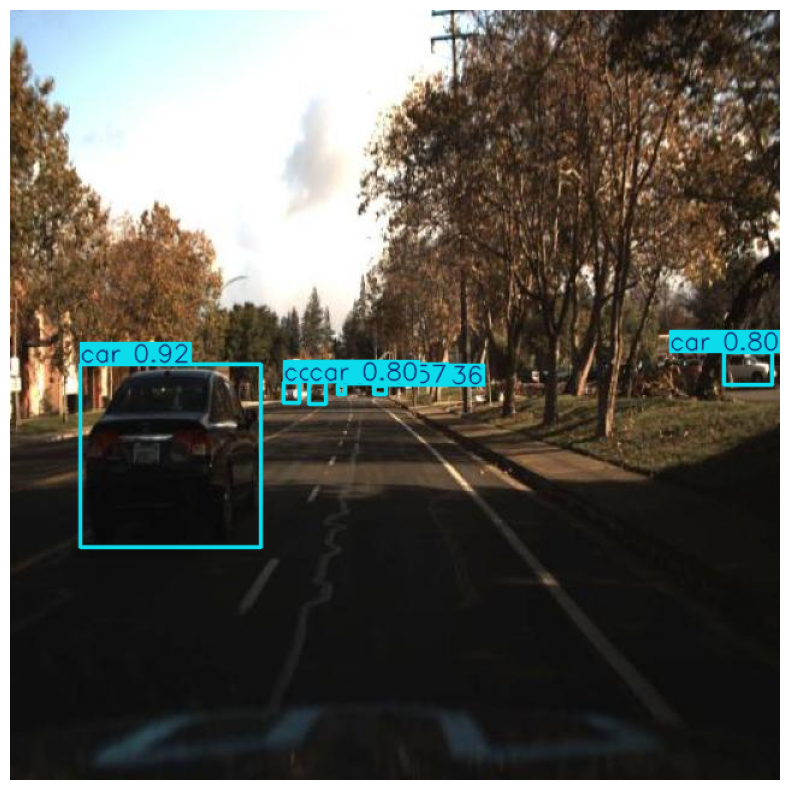

In [3]:
# Prediction
%matplotlib inline
import os, torch, cv2
import matplotlib.pyplot as plt

image_path = "data/1478019960189614397_jpg.rf.12919700f82ddb61178e3e42c67612d2.jpg"
results = model(image_path)
print()
print("Results:")
print(results)
print()

for result in results:
    print("Boxes:")
    print(result.boxes)

    # result.show()
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Display images with matplotlib 
    result.save(filename="outputs/cat_dog_image_result.jpg")
    
    # print(image_path.split(os.path.sep)[-1])
    # cat_dog_image.jpg
    # print(os.path.splitext(image_path.split(os.path.sep)[-1])[0])
    # cat_dog_image
    result.save(filename=os.path.splitext("outputs/" + image_path.split(os.path.sep)[-1])[0] + "_" + model.model_name + "_result.jpg")

In [ ]:
# Continue training
from ultralytics import YOLO

# Load the model with the previously trained weights
model = YOLO('/home/yungshun317/workspace/py/torch-cv/runs/detect/train/weights/last.pt')

# Continue training for additional epochs
# model.train(data='data.yaml', epochs=200, imgsz=640, batch=64, workers=0)
results = model.train(data="/home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset-1/data.yaml", epochs=300, imgsz=640)

In this case, we demonstrated how automatic conversion works in Roboflow, but if we know the data format beforehand, we can train with the entire Udacity Self Driving Car Dataset by just separating datasets manually.

In [17]:
import random, shutil
from pathlib import Path

shuffled_indices = list(range(29800))
# `random.shuffle()` will alter the data in-place but will not invoke sorting like `random.sample()`
random.seed(0)
random.shuffle(shuffled_indices)
# print(len(shuffled_indices))
# 29800

def sorted_directory_listing_with_os_listdir(directory):
    items = os.listdir(directory)
    sorted_items = sorted(items)
    return sorted_items

sorted_image_list = sorted_directory_listing_with_os_listdir("/home/yungshun317/workspace/py/torch-cv/Self-Driving-Car-3/export/images")
sorted_label_list = sorted_directory_listing_with_os_listdir("/home/yungshun317/workspace/py/torch-cv/Self-Driving-Car-3/export/labels")

image_src = "/home/yungshun317/workspace/py/torch-cv/Self-Driving-Car-3/export/images/"
train_image_dst = "/home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset/train/images/"
valid_image_dst = "/home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset/valid/images/"
test_image_dst = "/home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset/test/images/"
label_src = "/home/yungshun317/workspace/py/torch-cv/Self-Driving-Car-3/export/labels/"
train_label_dst = "/home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset/train/labels/"
valid_label_dst = "/home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset/valid/labels/"
test_label_dst = "/home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset/test/labels/"

# 70% to the training set, 20% to the validation set &  remaining 10% to the testing set
train_size = int(29800 * 0.7)
# 20860
valid_size = int(29800 * 0.2)
# 5960

Path(train_image_dst).mkdir(parents=True, exist_ok=True)
Path(valid_image_dst).mkdir(parents=True, exist_ok=True)
Path(test_image_dst).mkdir(parents=True, exist_ok=True)
Path(train_label_dst).mkdir(parents=True, exist_ok=True)
Path(valid_label_dst).mkdir(parents=True, exist_ok=True)
Path(test_label_dst).mkdir(parents=True, exist_ok=True)

# Copy `shuffled_indices[:20860]` files to the training set folder
for idx in shuffled_indices[:train_size]:
    shutil.copyfile(image_src + sorted_image_list[idx], train_image_dst + sorted_image_list[idx])
    shutil.copyfile(label_src + sorted_label_list[idx], train_label_dst + sorted_label_list[idx])

# Copy `shuffled_indices[20860:26820]` files to the validation set folder
for idx in shuffled_indices[train_size:train_size + valid_size]:
    shutil.copyfile(image_src + sorted_image_list[idx], valid_image_dst + sorted_image_list[idx])
    shutil.copyfile(label_src + sorted_label_list[idx], valid_label_dst + sorted_label_list[idx])

# Copy `shuffled_indices[26820:]` files to the validation set folder
for idx in shuffled_indices[train_size + valid_size:]:
    shutil.copyfile(image_src + sorted_image_list[idx], test_image_dst + sorted_image_list[idx])
    shutil.copyfile(label_src + sorted_label_list[idx], test_label_dst + sorted_label_list[idx])

In [18]:
# Check if all data names are the same in the training set
train_image_list = os.listdir(train_image_dst)
train_label_list = os.listdir(train_label_dst)

train_image_name_list = list(map(lambda image: image[:-4], train_image_list))
train_label_name_list = list(map(lambda label: label[:-4], train_label_list))

train_name_list = set(train_image_name_list).intersection(set(train_label_name_list))
print(len(train_name_list))
# 20860

# Check if all data names are the same in the validation set
valid_image_list = os.listdir(valid_image_dst)
valid_label_list = os.listdir(valid_label_dst)

valid_image_name_list = list(map(lambda image: image[:-4], valid_image_list))
valid_label_name_list = list(map(lambda label: label[:-4], valid_label_list))

valid_name_list = set(valid_image_name_list).intersection(set(valid_label_name_list))
print(len(valid_name_list))

# Check if all data names are the same in the testing set
test_image_list = os.listdir(test_image_dst)
test_label_list = os.listdir(test_label_dst)

test_image_name_list = list(map(lambda image: image[:-4], test_image_list))
test_label_name_list = list(map(lambda label: label[:-4], test_label_list))

test_name_list = set(test_image_name_list).intersection(set(test_label_name_list))
print(len(test_name_list))

20860
5960
2980


In [1]:
# Train
from ultralytics import YOLO

model = YOLO("yolo11m.pt")

# Use the absolute path of the `data.yaml` file
results = model.train(data="/home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset/data.yaml", epochs=300, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.21 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.20 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16072MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False

train: Scanning /home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Dr

train: WARNING ⚠️ /home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset/train/images/1478021875081281646_jpg.rf.bEZPhuyXU5hIovwQSTIp.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset/train/images/1478021875081281646_jpg.rf.e9552980cf8c6fef4aa02cb84c6364f5.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset/train/images/1478897760163798179_jpg.rf.5Pzrj3Eg3vZuyl7ztKAt.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset/train/images/1478897760163798179_jpg.rf.98623be50b02ff17d58f89fddf7a0c6c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset/train/images/1478898145212453716_jpg.rf.6a92d7d7dd523160c990c4e4375bcea9.jpg: 1 duplicate labels removed

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.19 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driv


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      8.58G      1.463      1.116      1.145         92        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       5960      38259      0.586      0.467      0.454       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      8.52G      1.463     0.9548      1.148         61        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       5960      38259       0.55      0.455       0.48      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      8.53G      1.509       1.01      1.179        150        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       5960      38259      0.598      0.381      0.403      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      8.57G      1.528      1.023      1.196         88        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       5960      38259      0.535      0.441       0.46       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      8.55G      1.488     0.9648      1.177        113        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       5960      38259      0.728      0.474      0.514      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      8.57G      1.457     0.9265      1.171         97        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       5960      38259      0.745      0.473      0.538      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      8.53G       1.43     0.8893      1.154        115        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       5960      38259       0.76      0.495      0.556      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      8.54G      1.414     0.8674      1.148        150        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       5960      38259      0.733      0.519      0.582      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      8.52G      1.397     0.8496      1.136        113        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       5960      38259      0.786      0.525      0.594      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      8.55G       1.38     0.8357      1.132        123        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.736       0.56      0.605      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      8.56G      1.368     0.8189      1.126        111        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       5960      38259      0.777      0.552      0.623      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      8.52G      1.361     0.8072      1.121        103        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.788      0.573      0.631      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      8.51G      1.347     0.7995      1.119         99        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       5960      38259      0.798      0.567      0.637      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      8.52G      1.338     0.7857      1.112        222        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       5960      38259      0.805      0.576      0.646       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      8.52G      1.331     0.7767      1.106        117        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       5960      38259      0.802      0.582      0.656       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      8.52G      1.323     0.7692      1.106         78        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       5960      38259      0.811      0.589       0.66      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      8.59G      1.315     0.7573      1.102        124        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.806      0.599      0.668      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      8.54G      1.307     0.7513      1.099         55        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.799      0.596      0.675       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      8.58G      1.299     0.7464      1.095        132        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.817      0.604      0.677      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      8.56G      1.294     0.7395      1.094         71        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       5960      38259      0.834      0.607       0.69      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      8.54G      1.287     0.7314      1.087        100        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259       0.84       0.62      0.708      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      8.53G      1.275     0.7236      1.082         94        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.825      0.628      0.709      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      8.49G      1.271     0.7193      1.081        107        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.826      0.624      0.746      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      8.54G      1.268     0.7129      1.082         75        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.857      0.615      0.721      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      8.52G      1.255     0.7041      1.076        108        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.705      0.672      0.723      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      8.51G      1.252     0.7007      1.076        131        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259       0.85      0.635      0.758      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      8.62G      1.247     0.6958      1.072        111        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.845      0.637       0.74       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      8.56G      1.245     0.6947      1.071        147        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.722      0.676      0.733       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      8.53G      1.232     0.6846      1.067        100        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.861      0.642      0.749      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      8.52G      1.231     0.6837      1.066        169        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.765      0.689      0.759      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      8.58G      1.224     0.6765      1.063        105        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.747      0.723      0.768       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      8.51G      1.218     0.6747      1.063        102        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.727      0.737       0.78      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      8.54G      1.213     0.6652      1.057        178        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.711      0.742       0.79      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      8.53G      1.211     0.6655      1.059         85        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.853      0.673      0.774      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300       8.5G      1.205     0.6606      1.054        112        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259       0.79      0.714      0.782      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      8.56G      1.196     0.6561      1.054         65        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.799      0.716      0.785      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      8.54G      1.198     0.6552      1.054        122        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.862      0.672      0.789      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      8.56G      1.192     0.6514       1.05         76        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.879      0.668      0.783      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      8.55G       1.19     0.6509       1.05         92        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.872      0.672      0.788      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      8.53G      1.184     0.6448      1.047        151        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.772      0.723      0.801      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      8.55G       1.18     0.6415      1.047        123        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259        0.8      0.739      0.806      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      8.51G      1.175     0.6389      1.043         66        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.828      0.729      0.802      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300       8.5G      1.169     0.6367      1.042        117        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.862      0.715      0.808      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      8.51G      1.166     0.6326      1.042         88        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.862      0.738      0.811       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300       8.5G      1.165     0.6293      1.039        107        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.871      0.734       0.81      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      8.58G      1.162     0.6267      1.039         90        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.873      0.736      0.813      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      8.54G      1.154     0.6237      1.035        142        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.864      0.746      0.817      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300       8.5G      1.149     0.6181      1.031        138        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.868      0.736      0.817      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      8.54G      1.148      0.619       1.03        123        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.856      0.762      0.819       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      8.49G      1.148     0.6185       1.03         77        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.861       0.75       0.82      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      8.52G      1.143     0.6127      1.029         71        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.862      0.748      0.815      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      8.54G      1.139      0.613      1.029        172        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.866      0.747      0.817       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      8.54G      1.133     0.6099      1.026        113        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.867      0.747      0.814      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300       8.5G      1.129     0.6059      1.024         98        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.876      0.738      0.812      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      8.53G      1.128     0.6044      1.024        119        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.815      0.759      0.809      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      8.52G      1.128     0.6033      1.023         90        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.884      0.736      0.813      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      8.54G      1.119      0.599      1.021        132        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.848      0.753      0.815      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      8.52G      1.119     0.5984      1.022         74        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.873      0.735      0.813      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      8.55G      1.115     0.5977      1.021        149        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.852      0.752      0.815      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      8.55G      1.108     0.5931      1.016         89        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.841      0.761      0.816      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      8.55G      1.108     0.5915      1.017        104        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.842      0.763      0.816      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      8.51G      1.105     0.5901      1.016         80        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.847      0.759      0.816        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      8.51G      1.104     0.5885      1.017        101        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.849      0.761      0.817      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      8.53G        1.1     0.5869      1.016        121        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.848      0.761      0.817        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      8.51G      1.096     0.5847      1.012        182        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.848      0.762      0.817      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      8.52G      1.092     0.5822      1.011        112        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.852      0.762      0.818      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      8.55G      1.093     0.5807       1.01        130        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.851      0.758      0.818      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      8.55G      1.087      0.578      1.008         91        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.858      0.757      0.819      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      8.54G      1.082     0.5741      1.009        153        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.862      0.756       0.82      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      8.49G      1.084     0.5751      1.007        109        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.865      0.757      0.822      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      8.53G      1.078      0.572      1.006        182        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.862      0.762      0.822      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      8.51G      1.077      0.571      1.005         53        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.856      0.768      0.822      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      8.52G      1.075     0.5711      1.005        111        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.853      0.769      0.822      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      8.52G      1.071     0.5685      1.003        176        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.853       0.77      0.823      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300       8.5G       1.07     0.5689      1.002         77        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.854      0.768      0.822      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      8.56G      1.065     0.5634      1.001        148        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.873      0.758      0.827      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      8.58G      1.059     0.5603      0.997        146        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.877      0.756      0.828      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      8.53G      1.059     0.5601     0.9971        135        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.885      0.752      0.828      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300       8.5G      1.058     0.5601      1.001        169        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.887       0.75      0.828      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      8.56G      1.061     0.5605     0.9967         87        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259       0.89       0.75      0.829      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      8.53G      1.056     0.5587     0.9967        143        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.888      0.751      0.831      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      8.58G      1.049     0.5549     0.9962        153        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.891      0.747      0.831      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      8.54G      1.048     0.5552     0.9958        127        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.893      0.749      0.832      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      8.56G      1.049     0.5541     0.9946         83        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.896      0.748      0.832      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      8.52G      1.042     0.5495     0.9908        174        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.899      0.745      0.832      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      8.49G      1.042     0.5502     0.9903         66        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.899      0.746      0.833      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      8.58G       1.04      0.547     0.9915        103        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.849      0.789      0.835      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      8.53G      1.035     0.5474     0.9891        151        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.852      0.788      0.836      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      8.51G      1.038     0.5465     0.9909        119        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.853      0.787      0.836      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      8.51G      1.023     0.5413     0.9856        107        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.854      0.787      0.836      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300       8.5G      1.031     0.5432     0.9876        168        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.856      0.785      0.836      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      8.52G      1.024      0.541     0.9832        141        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.858       0.78      0.837      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300       8.5G      1.025     0.5399     0.9844        103        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.892      0.776       0.84      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      8.51G      1.023     0.5399     0.9848         96        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.888      0.783       0.84      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      8.55G       1.02     0.5375     0.9836        131        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.889      0.784      0.841      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      8.52G      1.017     0.5357     0.9818        114        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259       0.89      0.785      0.841      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300       8.5G      1.018     0.5347     0.9836         95        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.889      0.785      0.842      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      8.52G      1.012     0.5354     0.9817        109        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.887      0.786      0.841      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      8.55G      1.009     0.5314     0.9792        165        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.886      0.787      0.842      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      8.49G      1.008     0.5316      0.981        120        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.886      0.786      0.843      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      8.49G       1.01     0.5314     0.9814        127        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.888      0.786      0.842      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      8.49G      1.003     0.5272     0.9778        161        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.889      0.787      0.844       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      8.52G      1.003     0.5275     0.9768         89        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.888      0.788      0.844       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300       8.5G      1.001     0.5273     0.9758        138        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.887      0.789      0.845       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      8.55G     0.9957     0.5242     0.9763        125        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.886       0.79      0.845      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      8.54G          1     0.5263      0.975         82        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.886      0.791      0.845      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      8.53G     0.9963     0.5234     0.9743        127        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.888      0.793      0.846      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      8.52G     0.9915     0.5198     0.9701         85        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.886      0.791      0.846      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      8.51G     0.9908      0.521     0.9735        138        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.887      0.793      0.846      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      8.53G     0.9839     0.5182     0.9711        121        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.888      0.793      0.847      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      8.52G     0.9843      0.518     0.9709         88        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.887      0.793      0.847      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      8.54G     0.9834     0.5147     0.9701        197        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.888      0.795      0.848      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      8.53G     0.9811      0.515     0.9688        122        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.889      0.795      0.848      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      8.49G     0.9826     0.5158      0.971         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259       0.89      0.796      0.849      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      8.49G     0.9815     0.5139     0.9704        106        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259       0.89      0.794      0.848      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      8.53G     0.9751     0.5124     0.9655        100        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259       0.89      0.794      0.849       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      8.56G     0.9705     0.5089     0.9631         66        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.891      0.793      0.848      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      8.53G     0.9714     0.5099     0.9649        104        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.892      0.792      0.848      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      8.52G     0.9701     0.5099     0.9656        105        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.892      0.792      0.849       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300       8.5G     0.9682     0.5075     0.9643        163        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.893      0.791      0.849      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      8.52G     0.9665     0.5079     0.9651         82        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.891      0.792      0.849      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      8.52G     0.9628      0.506     0.9636        114        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.891      0.793      0.849      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      8.53G     0.9579     0.5027     0.9637         89        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259       0.89      0.793       0.85      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      8.55G     0.9608     0.5036     0.9601         61        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259       0.89      0.793       0.85      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      8.53G     0.9585     0.5022      0.961        109        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.889      0.794       0.85      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      8.52G     0.9571     0.5013     0.9593        115        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.888      0.795      0.851      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      8.53G      0.953      0.499     0.9571         80        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.888      0.797      0.851      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      8.52G     0.9512     0.4992     0.9571         89        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.888      0.796      0.851      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      8.54G     0.9513     0.4983     0.9579         93        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.889      0.796      0.851      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      8.51G      0.948     0.4964     0.9577        100        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.889      0.796      0.852      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      8.53G     0.9481     0.4966     0.9582        109        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.889      0.797      0.852      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      8.52G     0.9424     0.4935     0.9561        151        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.889      0.797      0.852      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      8.52G     0.9399     0.4913     0.9534         78        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259       0.89      0.797      0.853      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      8.55G     0.9417     0.4923      0.953         82        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259       0.89      0.797      0.853      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300       8.5G     0.9402     0.4916     0.9535        100        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.889      0.797      0.853       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      8.51G     0.9363     0.4894     0.9523        160        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.888      0.798      0.854       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      8.49G     0.9339     0.4886     0.9533        100        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.887      0.799      0.854      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      8.49G     0.9324     0.4878     0.9496        117        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.884        0.8      0.855      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      8.52G      0.931     0.4863     0.9512         95        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.886      0.798      0.855      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      8.52G     0.9327     0.4865     0.9514        119        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.888      0.797      0.855      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      8.54G     0.9266     0.4846     0.9504        118        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.891      0.795      0.855       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      8.56G     0.9241     0.4827     0.9505        121        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.893      0.792      0.856      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      8.52G     0.9209     0.4812     0.9475        100        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.895      0.792      0.856      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      8.52G     0.9214     0.4833     0.9475        104        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.896      0.792      0.856      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      8.51G     0.9198      0.482     0.9463        148        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.892      0.793      0.856      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300       8.5G     0.9179       0.48     0.9465        127        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.893      0.793      0.856      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      8.53G     0.9154     0.4787     0.9463        112        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.896      0.793      0.856      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      8.54G      0.914     0.4799     0.9421         88        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.895      0.792      0.856      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      8.49G     0.9121     0.4781     0.9445        134        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.896      0.792      0.856      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      8.53G     0.9098     0.4754     0.9447        117        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.897      0.791      0.857      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      8.52G       0.91     0.4756     0.9437        112        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.894      0.794      0.857      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      8.52G      0.909     0.4756     0.9452        114        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.893      0.796      0.856      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      8.51G     0.9085     0.4748     0.9441        100        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.893      0.796      0.857      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      8.52G     0.9023     0.4709     0.9406        173        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.893      0.797      0.856       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      8.51G     0.9034      0.474     0.9447         92        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.893      0.797      0.857       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      8.53G     0.8968     0.4692     0.9397         77        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.894      0.797      0.856      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      8.54G     0.8983     0.4692     0.9387        126        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.894      0.797      0.856      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      8.52G     0.8958     0.4683     0.9395         67        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.893      0.798      0.857      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      8.49G     0.8969     0.4689     0.9398        128        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.888        0.8      0.857      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      8.53G     0.8924     0.4659     0.9392        140        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.886        0.8      0.857      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      8.54G     0.8909     0.4654     0.9375        151        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.896      0.787      0.855      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      8.53G     0.8867      0.464      0.938        127        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.895      0.785      0.856      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      8.51G     0.8889     0.4645     0.9364         87        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.881      0.799      0.859      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      8.52G     0.8848     0.4619     0.9363        181        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.884      0.796      0.859      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      8.53G     0.8843     0.4623     0.9343         95        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.889      0.793      0.856      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      8.52G     0.8817     0.4603     0.9343        103        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.892       0.79      0.857      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      8.54G     0.8802     0.4587      0.933        137        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.897      0.789      0.859      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      8.51G     0.8815       0.46     0.9338         88        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.909      0.774      0.856      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      8.52G     0.8794     0.4593     0.9338         98        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.912      0.772      0.856      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      8.53G     0.8735     0.4576     0.9309        209        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.913      0.771      0.856      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      8.53G     0.8711     0.4561     0.9292         97        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.912      0.771      0.857      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      8.51G     0.8709     0.4552     0.9308        100        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.914       0.77      0.858      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      8.54G     0.8677     0.4542     0.9307        114        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.907      0.786      0.863      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      8.54G     0.8658     0.4509      0.929        106        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.905      0.788      0.863      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      8.52G     0.8651      0.452     0.9278        129        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.904      0.789       0.86      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      8.51G     0.8617     0.4498     0.9311        111        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.905      0.787      0.862      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      8.52G     0.8608     0.4504      0.928        101        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.921      0.768      0.858      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      8.52G     0.8552     0.4479     0.9254         55        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259       0.92      0.768      0.858      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      8.58G     0.8576     0.4468     0.9258        106        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.921      0.769      0.859      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      8.53G     0.8545     0.4475     0.9262        109        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.912      0.789      0.864       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      8.54G     0.8545      0.445     0.9263         78        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.924      0.769      0.858      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      8.58G     0.8529     0.4445     0.9257        180        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.925      0.769      0.858      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      8.57G     0.8501     0.4426     0.9241         73        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.925       0.77      0.859      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      8.49G     0.8472     0.4425      0.922         73        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.926      0.769      0.859      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300       8.6G     0.8429     0.4399     0.9222         94        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.926      0.768       0.86      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      8.55G     0.8406     0.4398     0.9193        122        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.924       0.77       0.86      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      8.51G     0.8424     0.4393     0.9196         95        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.922      0.773      0.859      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      8.54G     0.8403     0.4387     0.9218         69        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.921      0.776      0.861      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      8.53G     0.8395     0.4383     0.9223        159        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.924      0.776      0.864      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      8.51G     0.8363     0.4377     0.9205        156        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.914      0.793       0.87      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300       8.5G     0.8349      0.436     0.9189         81        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.913      0.792      0.872      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      8.51G     0.8291     0.4324     0.9191         97        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.912      0.792      0.872      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      8.52G     0.8271     0.4319     0.9165         76        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.912      0.793      0.874      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      8.54G      0.827     0.4326      0.917         90        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.911      0.795      0.875      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      8.52G      0.828     0.4308     0.9182         69        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.911      0.795      0.876      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300       8.5G     0.8255     0.4312     0.9152         91        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.911      0.796      0.878       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      8.55G     0.8216      0.429     0.9151        140        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.912      0.796      0.878      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      8.52G     0.8188     0.4272     0.9157         95        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.913      0.796       0.88      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300       8.5G     0.8156     0.4257     0.9133        166        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.913      0.795      0.869      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      8.58G     0.8174     0.4274     0.9132        120        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.914      0.796       0.87      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      8.52G     0.8169      0.427     0.9126         88        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.915      0.795      0.882      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      8.51G     0.8103     0.4234     0.9118         83        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.916      0.795      0.882      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      8.53G     0.8113     0.4248      0.912         96        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.916      0.795       0.87      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      8.52G     0.8101     0.4218     0.9115         72        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.916      0.796      0.868      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300       8.5G     0.8054     0.4215     0.9121         93        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.914      0.797      0.868      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      8.53G     0.8046     0.4202     0.9108        142        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.912      0.798      0.868      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      8.53G      0.804     0.4195     0.9111        145        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259       0.91      0.799      0.869      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      8.54G      0.799     0.4175     0.9093        114        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259       0.91      0.799      0.871      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      8.55G     0.7991     0.4184     0.9067        124        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.907      0.799      0.868      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      8.51G     0.7962     0.4172     0.9071        146        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.905        0.8      0.868      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      8.52G     0.7963      0.416     0.9078        145        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.905        0.8      0.867      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      8.53G     0.7926     0.4148     0.9059        112        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.904        0.8      0.867      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      8.52G     0.7905     0.4126     0.9055         83        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.903        0.8      0.869      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      8.49G     0.7856     0.4124     0.9042        101        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.924      0.783      0.867      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      8.53G     0.7839     0.4099     0.9032         80        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.924      0.783      0.867      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      8.51G     0.7828     0.4087     0.9039        131        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.922      0.783      0.866      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      8.49G      0.778     0.4074     0.9009        117        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.923      0.782      0.867      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      8.51G     0.7799     0.4081     0.9003        130        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.923      0.782      0.867      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      8.51G     0.7761     0.4059     0.9014         94        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.922      0.782      0.867      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      8.51G     0.7769     0.4064     0.9027        135        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.922      0.781      0.868      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300       8.5G     0.7711     0.4034     0.8986        178        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.858      0.822      0.868      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      8.49G     0.7711     0.4056        0.9        109        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.858      0.823      0.866      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      8.54G     0.7707     0.4037     0.8997        104        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.862      0.821      0.866      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      8.52G     0.7651     0.4008     0.8968        119        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.861      0.822      0.867      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      8.54G     0.7639     0.3996     0.8986        160        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.865       0.82      0.867      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      8.51G     0.7629     0.4009     0.8981        185        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.864       0.82      0.867      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300       8.5G     0.7566     0.3961     0.8966         80        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.864       0.82      0.867      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      8.52G     0.7579     0.3961     0.8959        133        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.865      0.819      0.868      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      8.51G     0.7541      0.395      0.895         93        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.866      0.817      0.868      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      8.51G     0.7516     0.3938     0.8959         73        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.868      0.819      0.869      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      8.53G     0.7524     0.3933     0.8941        140        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.867      0.821       0.87      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      8.52G     0.7501     0.3933     0.8956        157        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.868      0.823       0.87      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      8.52G     0.7492     0.3934      0.894        107        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.868      0.823       0.87      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300       8.5G     0.7439     0.3898     0.8925        131        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.873      0.822      0.871      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      8.51G     0.7388     0.3886     0.8909        130        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.875      0.823      0.871      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      8.54G     0.7381     0.3875     0.8925        121        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.875      0.824      0.871      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      8.53G     0.7379     0.3872     0.8928        164        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259        0.9      0.829       0.89      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      8.51G     0.7394     0.3878     0.8922        137        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.897       0.83      0.891      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      8.51G     0.7327     0.3844     0.8896        173        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.896       0.83      0.891      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      8.54G     0.7309     0.3837     0.8882         89        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.901       0.83      0.891      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      8.53G     0.7268     0.3839     0.8877        171        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.905      0.828       0.89      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      8.52G     0.7286     0.3834     0.8891         90        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.906      0.828       0.89      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      8.52G     0.7214      0.381     0.8857         99        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.898      0.834      0.893      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      8.53G     0.7191     0.3778      0.886         85        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.901      0.833      0.893      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      8.54G     0.7181     0.3784     0.8857        174        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.902      0.833      0.893      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300       8.5G     0.7165     0.3763     0.8845        132        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.904      0.833      0.893      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      8.53G     0.7157     0.3763     0.8848        144        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.906      0.832      0.894      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      8.53G      0.709     0.3739      0.882        116        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.909      0.831      0.894      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      8.48G     0.7058     0.3719     0.8829         84        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259       0.91       0.83      0.894      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      8.52G     0.7039     0.3706     0.8815        164        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259       0.91       0.83      0.894      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      8.53G     0.7044     0.3711     0.8823         85        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.907      0.831      0.894      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      8.53G     0.6999      0.369     0.8795         96        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.908      0.831      0.894      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      8.51G     0.6939     0.3671     0.8789         83        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.909      0.831      0.894       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      8.57G     0.6946      0.367     0.8791        100        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259       0.91       0.83      0.895       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      8.53G     0.6964     0.3681     0.8798        175        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.912      0.829      0.895      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      8.55G     0.6926     0.3662     0.8791        123        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.913      0.829      0.895      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      8.49G     0.6924     0.3647      0.878         77        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.913      0.829      0.895      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300       8.5G     0.6862     0.3623      0.876        142        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.914       0.83      0.895      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      8.59G     0.6804     0.3616     0.8766        120        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.913       0.83      0.895      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      8.51G     0.6792     0.3596     0.8754         85        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.914      0.829      0.895      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      8.51G     0.6782     0.3592      0.875        123        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.914      0.828      0.895      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      8.52G     0.6762     0.3579     0.8734        113        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.917      0.827      0.896      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      8.53G     0.6751     0.3578     0.8737         84        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.916      0.827      0.896      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      8.51G     0.6713     0.3557     0.8744         72        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.933      0.802      0.891      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300      8.49G     0.6658     0.3535     0.8717         57        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.934      0.802      0.891      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      8.55G     0.6646     0.3536     0.8719         82        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.924      0.824      0.896      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      8.56G     0.6614     0.3505     0.8717        142        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.932      0.804      0.892      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300       8.5G     0.6584     0.3496     0.8702        126        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.933      0.804      0.892      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      8.53G     0.6565     0.3491     0.8706         87        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.919      0.827      0.896      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      8.51G     0.6532     0.3472     0.8698         83        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259       0.92      0.827      0.896      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300      8.49G     0.6533     0.3466     0.8679        160        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259       0.92      0.828      0.897      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      8.51G      0.651     0.3457     0.8684        117        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.897      0.832      0.892      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      8.48G     0.6465     0.3434     0.8678        161        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.898      0.831      0.892      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      8.57G     0.6451      0.343     0.8665        107        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.899      0.831      0.892      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      8.52G     0.6396     0.3398      0.865        141        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259        0.9       0.83      0.892      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      8.52G     0.6389     0.3401     0.8647        113        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.902       0.83      0.892      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      8.51G     0.6357     0.3395     0.8644        137        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.903      0.829      0.892      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300       8.5G     0.6335     0.3383     0.8641        170        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.918      0.829      0.896      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      8.54G     0.6282     0.3354     0.8623         46        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.918      0.829      0.896      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      8.51G     0.6281     0.3353     0.8633        143        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.917       0.83      0.895      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300       8.5G     0.6273      0.335      0.863        118        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.914       0.83      0.894      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      8.51G     0.6229     0.3328     0.8616         87        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.913      0.831      0.894      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      8.58G     0.6195      0.332     0.8615        130        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.899      0.833      0.889      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      8.49G     0.6192     0.3311     0.8621        116        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.897      0.832      0.887      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      8.55G     0.6131     0.3292       0.86        135        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.897      0.834      0.887      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      8.53G     0.6122     0.3289     0.8587        130        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.896      0.836      0.888      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      8.52G     0.6097     0.3277     0.8595        107        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.894      0.835      0.887      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      8.51G     0.6068     0.3247     0.8582        102        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.895      0.837      0.889      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      8.48G     0.6038     0.3228     0.8579        152        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.894      0.837      0.888      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300       8.5G     0.5992     0.3218     0.8559         71        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.893      0.838      0.888      0.639


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      8.55G     0.5609     0.2876     0.8405         55        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.893      0.838      0.888       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      8.56G     0.5498     0.2841     0.8385         87        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.892      0.839      0.888       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      8.51G     0.5409     0.2808      0.837         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.892       0.84      0.888      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      8.56G     0.5365     0.2791      0.835         76        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.892       0.84      0.887      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300       8.5G     0.5354     0.2789     0.8358         56        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.906       0.84      0.892      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300      8.55G     0.5299     0.2766     0.8327         59        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.905      0.841      0.892      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300      8.52G     0.5255     0.2749     0.8329         78        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.892       0.84      0.886      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      8.52G     0.5219     0.2737      0.833         95        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.906      0.841      0.891      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300      8.53G     0.5183     0.2717      0.832         87        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.907      0.841      0.891      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300      8.58G     0.5154     0.2702      0.832         76        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       5960      38259      0.907      0.841      0.891      0.645



300 epochs completed in 28.859 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 40.6MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 40.6MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.20 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16072MiB)
YOLO11m summary (fused): 303 layers, 20,038,513 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       5960      38259      0.906      0.841      0.891      0.645
                 biker        464        725      0.872      0.836      0.872       0.65
                   car       5128      25430      0.943      0.874      0.923      0.761
            pedestrian       1356       4035      0.857      0.781      0.842      0.592
          trafficLight        617        990      0.936      0.943      0.974      0.806
    trafficLight-Green        771       2106      0.882      0.798      0.857      0.531
trafficLight-GreenLeft         72        100      0.844       0.87      0.879      0.641
      trafficLight-Red        987       2642      0.927      0.859      0.922      0.713
  trafficLight-RedLeft        510        678      0.907      0.862      0.916       0.69
   trafficLight-Yellow         47        120      0.885      0.692        0.8      0.494
trafficLight-YellowLeft          5          6      0.967      0.833      0.879      0.405
                 tru

In [2]:
# Validation
results = model.val(data="/home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset/data_test.yaml", imgsz=640)
print()
print("mAP:", results.box.map)

Ultralytics 8.3.20 🚀 Python-3.12.3 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090 Laptop GPU, 16072MiB)
YOLO11m summary (fused): 303 layers, 20,038,513 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning /home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driv


val: New cache created: /home/yungshun317/workspace/py/torch-cv/datasets/Udacity-Self-Driving-Car-Dataset/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       2980      19792      0.944      0.845      0.913      0.692
                 biker        240        370      0.926      0.808      0.891      0.658
                   car       2584      12834       0.96      0.876      0.929       0.77
            pedestrian        723       2264      0.931      0.758      0.845      0.604
          trafficLight        340        529      0.955      0.924      0.971      0.798
    trafficLight-Green        410       1122      0.926      0.771      0.855      0.537
trafficLight-GreenLeft         46         67      0.904      0.851      0.916      0.666
      trafficLight-Red        564       1458      0.956      0.865      0.934      0.752
  trafficLight-RedLeft        275        360      0.981      0.878       0.94      0.733
   trafficLight-Yellow         28         53      0.927      0.811      0.906      0.586
                 truck        515        735       0.97      0.905      0.942      0.819
Speed: 0.2ms preproce


image 1/1 /home/yungshun317/workspace/py/torch-cv/data/1478901353576726102_jpg.rf.300ef9f3abf68059b5f6d85621cb272e.jpg: 640x640 9 cars, 1 pedestrian, 1 trafficLight, 4 trafficLight-Reds, 2 trucks, 4.9ms
Speed: 1.8ms preprocess, 4.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

Results:
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'biker', 1: 'car', 2: 'pedestrian', 3: 'trafficLight', 4: 'trafficLight-Green', 5: 'trafficLight-GreenLeft', 6: 'trafficLight-Red', 7: 'trafficLight-RedLeft', 8: 'trafficLight-Yellow', 9: 'trafficLight-YellowLeft', 10: 'truck'}
obb: None
orig_img: array([[[247, 235, 211],
        [241, 229, 205],
        [233, 221, 197],
        ...,
        [252, 222, 193],
        [249, 220, 193],
        [248, 219, 192]],

       [[255, 246, 224],
        [252, 242, 218],
        [250, 237, 215],
        ...,
        [249, 219, 190],
        [247, 217

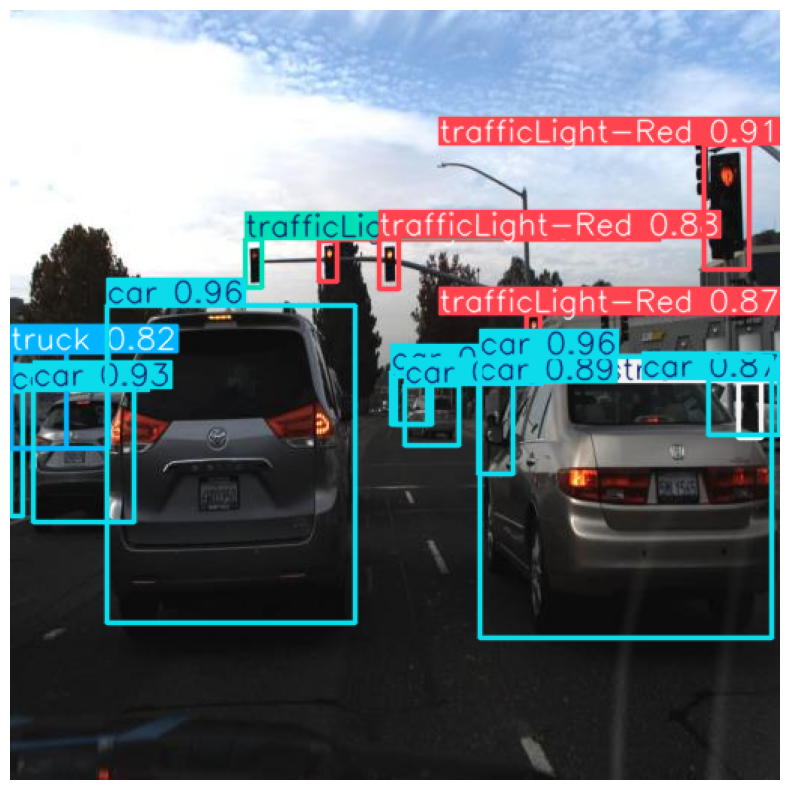

In [3]:
# Prediction
%matplotlib inline
import os, torch, cv2
import matplotlib.pyplot as plt

image_path = "data/1478901353576726102_jpg.rf.300ef9f3abf68059b5f6d85621cb272e.jpg"
results = model(image_path)
print()
print("Results:")
print(results)
print()

for result in results:
    print("Boxes:")
    print(result.boxes)

    # result.show()
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Display images with matplotlib 
    result.save(filename="outputs/cat_dog_image_result.jpg")
    
    # print(image_path.split(os.path.sep)[-1])
    # cat_dog_image.jpg
    # print(os.path.splitext(image_path.split(os.path.sep)[-1])[0])
    # cat_dog_image
    result.save(filename=os.path.splitext("outputs/" + image_path.split(os.path.sep)[-1])[0] + "_" + model.model_name + "_result.jpg")

## 2-13. YOLO-World